<a href="https://colab.research.google.com/github/vish1007/vish1007/blob/main/Email_Campaign_Effectiveness_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


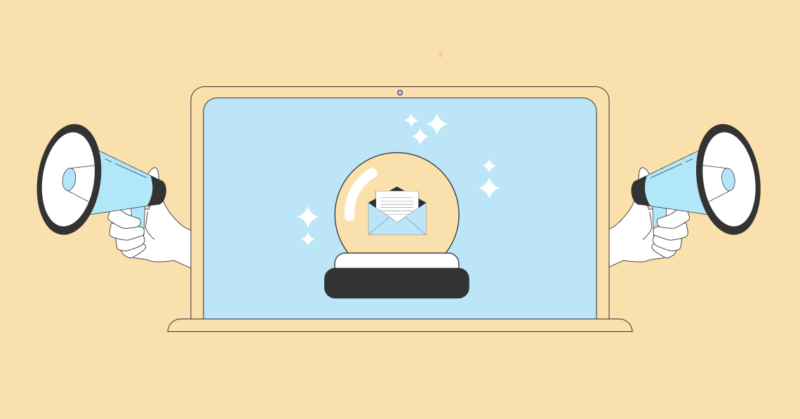

# **Project Name**    -Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -**  Ratnesh Verma
##### **Team Member 2 -**  Santanu Pal
##### **Team Member 3 -**  Vishal Singh

# **Project Summary -**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

#**Introduction:**



Email Marketing can be defined as a marketing technique in which businesses stay connected with their customers through emails, making them aware about their new products, updates, important notices related to the products they are using.

Most importantly, email marketing allows businesses to build relationships with leads, new customers and past customers. It's a way to communicate directly to the customers in their inbox, at a time that is convenient for them. With the right messaging tone and strategies, emails are one of the most important marketing channels.

We all subscribe to many different kinds of businesses through emails because it's required to do so, sometimes to get digital receipts of the things we bought or to get digital information about the business to stay updated. But many of times we do not tend to read an email due to a number of reasons - to name a few would be- no proper structure, too many images, too many links inside the mail, complex vocabulary used or simply too long emails.

In this problem statement, we will be trying to create machine learning models that characterize and predict whether the mail is ignored, read or acknowledged by the reader. In addition to this, we will be trying to analyze and find all the features that are important for an email to not get ignored.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/ML project/data_email_campaign.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('The number of rows in data is:',df.shape[0])
print('The number of columns in data is',len(list(df.columns)))

The number of rows in data is: 68353
The number of columns in data is 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_rows_in_store_data = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows_in_store_data)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64


<Axes: >

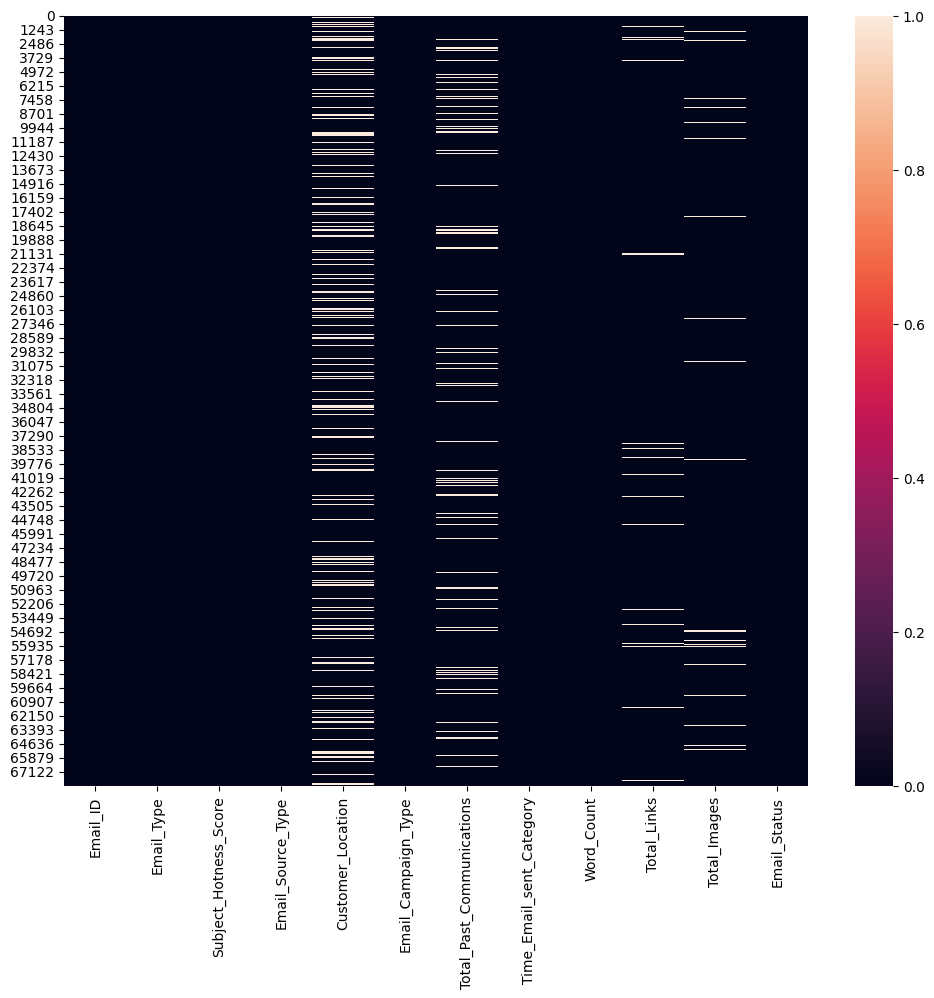

In [ ]:
# Visualizing the missing values

sns.heatmap(df.isnull(), cbar=True)

In [ ]:
df["Email_Status"].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

### What did you know about your dataset?

1.   We have :

     The number of rows in data is: 68353

     The number of columns in data is 12

2.   We have a lot of nulls in the following columns:

* Customer Location
* Total Past Communications
* Total Links
* Total Images


But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on.
Let's fill up the null values in other columns.

3. Data imbalane
   
      0   : 54941

      1   : 11039

      2   :  2373

## ***2. Understanding  Variables or Features***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
for col in df.columns:
    print(f'The unique values in column {col} are',df[col].unique())

The unique values in column Email_ID are ['EMA00081000034500' 'EMA00081000045360' 'EMA00081000066290' ...
 'EMA00089998436500' 'EMA00089999168800' 'EMA00089999316900']
The unique values in column Email_Type are [1 2]
The unique values in column Subject_Hotness_Score are [2.2 2.1 0.1 3.  0.  1.5 3.2 0.7 2.  0.5 0.2 1.  4.  1.9 1.1 1.6 0.3 2.3
 1.4 1.7 2.8 1.2 0.8 0.6 4.2 1.8 2.4 0.9 1.3 3.3 2.6 3.1 4.1 2.9 2.7 0.4
 3.5 3.7 2.5 3.8 3.9 3.4 4.6 4.5 3.6 4.4 4.7 5.  4.3 4.8 4.9]
The unique values in column Email_Source_Type are [2 1]
The unique values in column Customer_Location are ['E' nan 'B' 'C' 'G' 'D' 'F' 'A']
The unique values in column Email_Campaign_Type are [2 3 1]
The unique values in column Total_Past_Communications are [33. 15. 36. 25. 18. nan 34. 21. 40. 27. 24. 42. 11. 23. 37. 35. 51.  9.
 39. 31. 50. 30. 14. 45. 53. 28.  7. 38. 52. 22. 43. 12. 16. 20. 41. 56.
 26. 29.  5. 32. 44. 10. 17. 46. 47. 48.  8. 49. 13.  0.  6. 55. 19. 60.
 59. 61. 54. 62. 57. 64. 58. 65. 66. 67. 63.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Email_ID is 68353 .
No. of unique values in  Email_Type is 2 .
No. of unique values in  Subject_Hotness_Score is 51 .
No. of unique values in  Email_Source_Type is 2 .
No. of unique values in  Customer_Location is 7 .
No. of unique values in  Email_Campaign_Type is 3 .
No. of unique values in  Total_Past_Communications is 64 .
No. of unique values in  Time_Email_sent_Category is 3 .
No. of unique values in  Word_Count is 151 .
No. of unique values in  Total_Links is 37 .
No. of unique values in  Total_Images is 45 .
No. of unique values in  Email_Status is 3 .


### Variables Description

Our features:
* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.


* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.

     1-Sales & Marketting

     2-Important admin mails related to product
    
* **Email Campaign Type** - The campaign type of the email.

   Campaign type -1

   Campaign type-2

   campaign type -3
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.A.B,C,D,E,F,G
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

    1-Morning

    2-Evening

    3-Night
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

In [ ]:
df.head(20)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
5,EMA00081000131660,1,1.5,1,G,2,NaN,2,416,11.0,0.0,0
6,EMA00081000160500,1,3.2,1,E,2,34.0,3,116,4.0,0.0,0
7,EMA00081000269630,1,0.7,2,G,2,21.0,2,1241,6.0,2.0,0
8,EMA00081000287790,1,2.0,1,G,2,NaN,3,655,11.0,4.0,0
9,EMA00081000367310,2,0.5,1,G,2,40.0,3,655,11.0,0.0,0


## ***3. Exploratory Data Analysis.***



#### Chart - 1 Pie Charts of Each Categorical Columns of given dataset(Univariate)

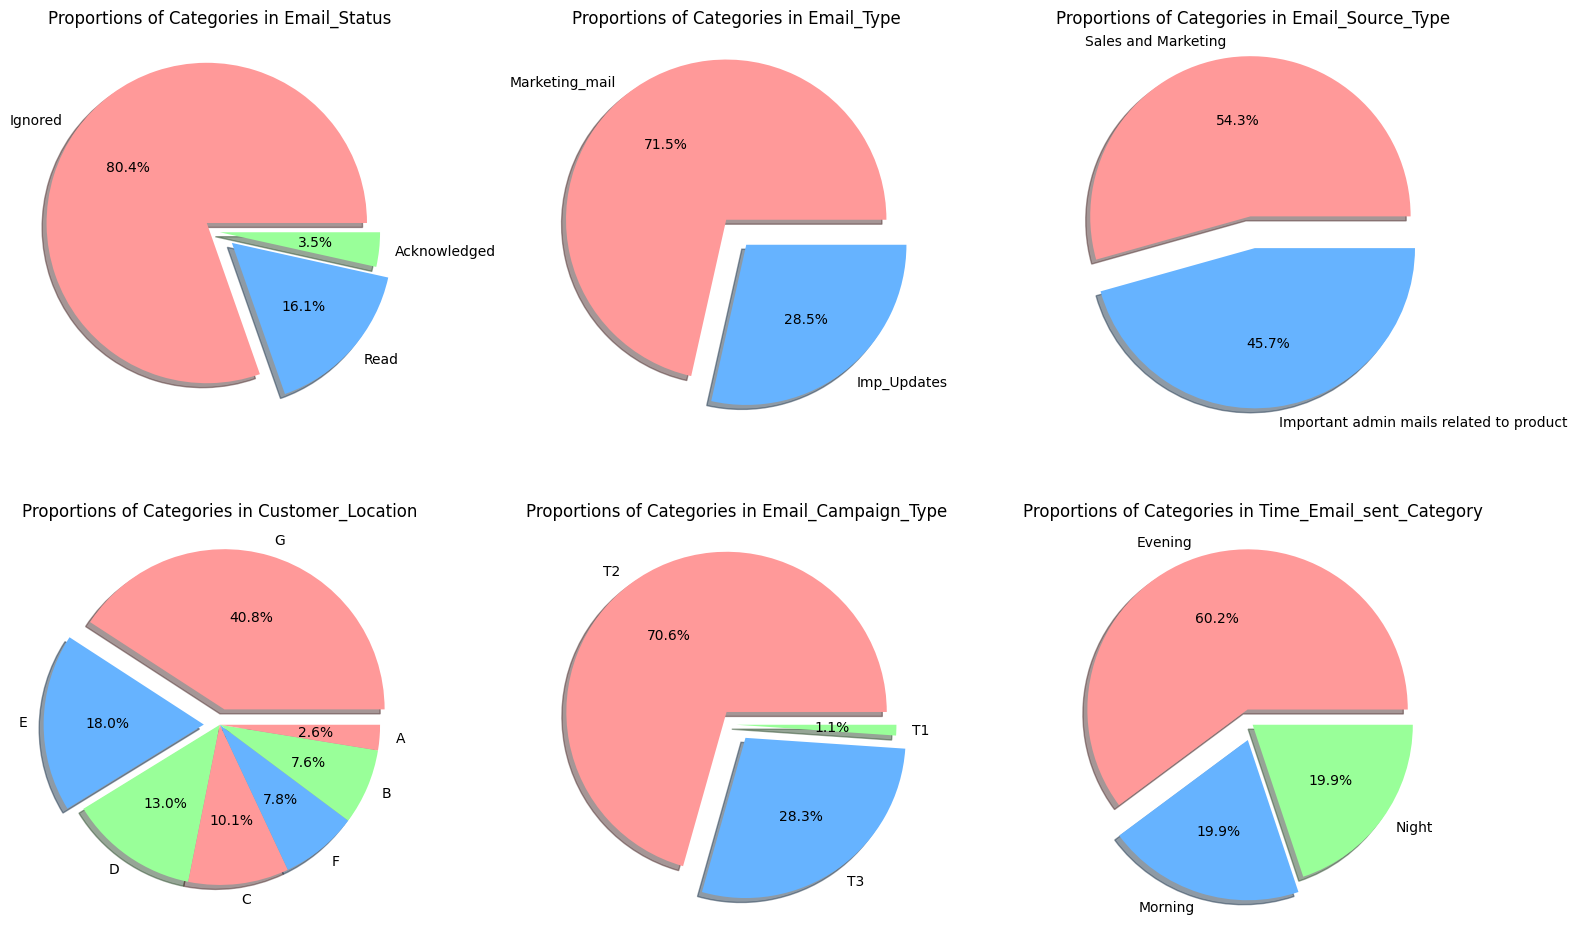

In [ ]:
import matplotlib.pyplot as plt

categorical_variables = ['Email_Status', 'Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))  # Increased size (16x10 inches)

# Flatten axes for easier iteration
axes = axes.flatten()

# Custom labels for each categorical variable
labels = [
    ["Ignored", "Read", "Acknowledged"],
    ["Marketing_mail", "Imp_Updates"],
    ["Sales and Marketing", "Important admin mails related to product"],
    [ "G","E","D","C","F","B","A"],
    ["T2", "T3", "T1"],
    [ "Evening","Morning","Night" ]
]

for idx, var in enumerate(categorical_variables):
    counts = df[var].value_counts()

    # Generate explode values for the first two categories
    explode_values = [0.1 if i < 2 else 0 for i in range(len(counts))]

    axes[idx].pie(counts, explode=explode_values, labels=labels[idx], shadow=True, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
    axes[idx].set_title(f'Proportions of Categories in {var}')

# Remove any extra empty subplots
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### Chart-2 Distriburion plot of Continuous Features(Univariate)

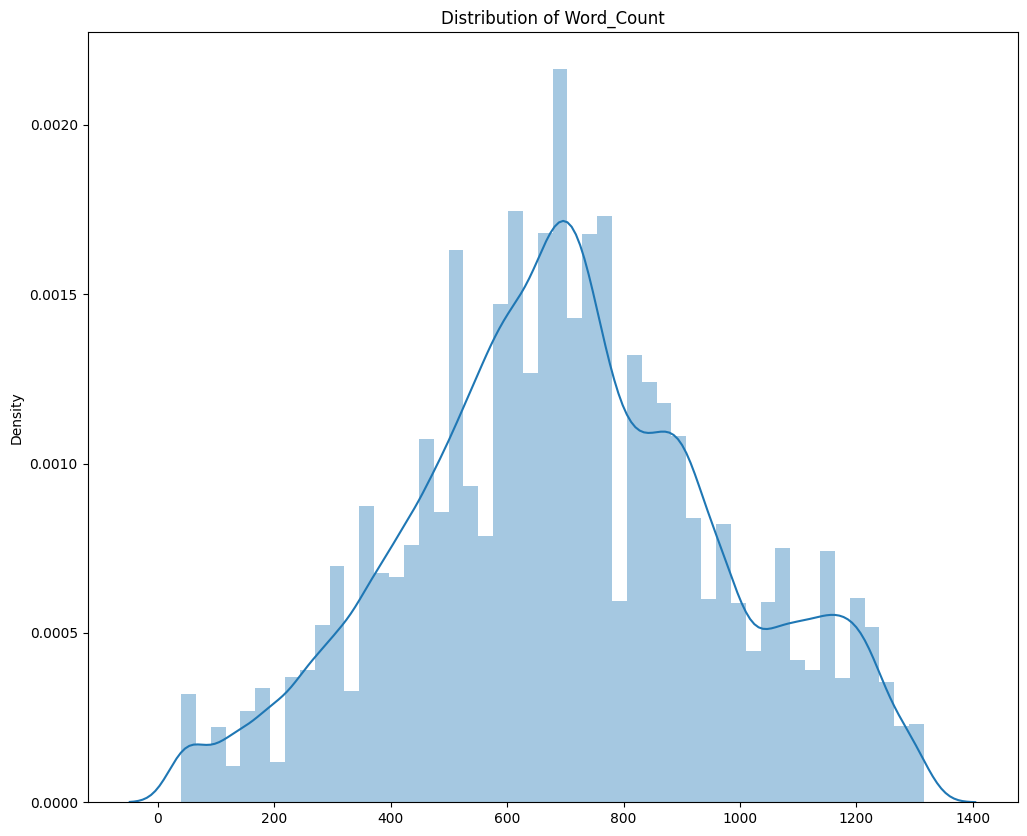

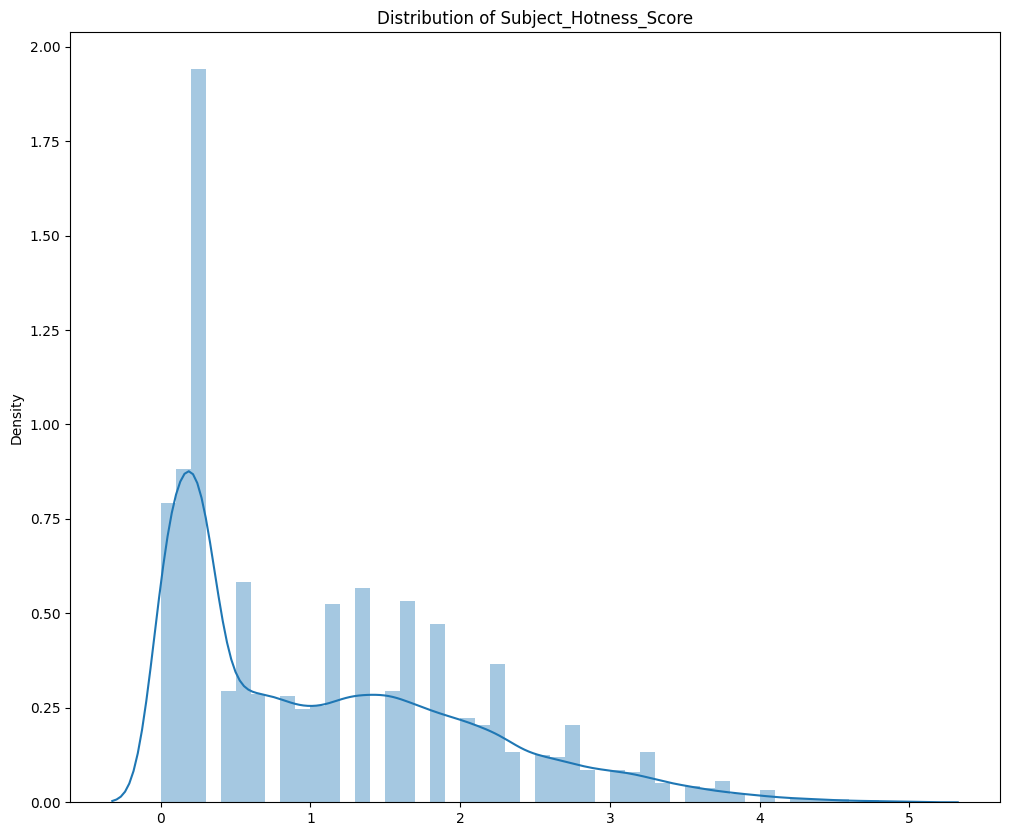

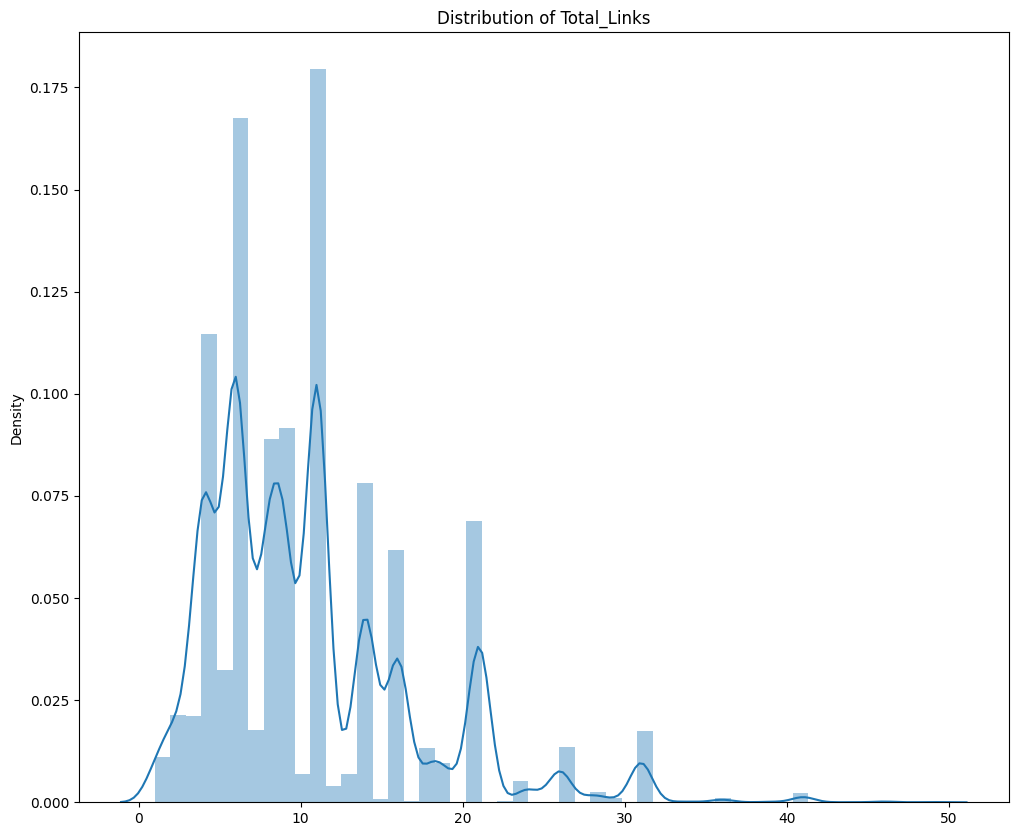

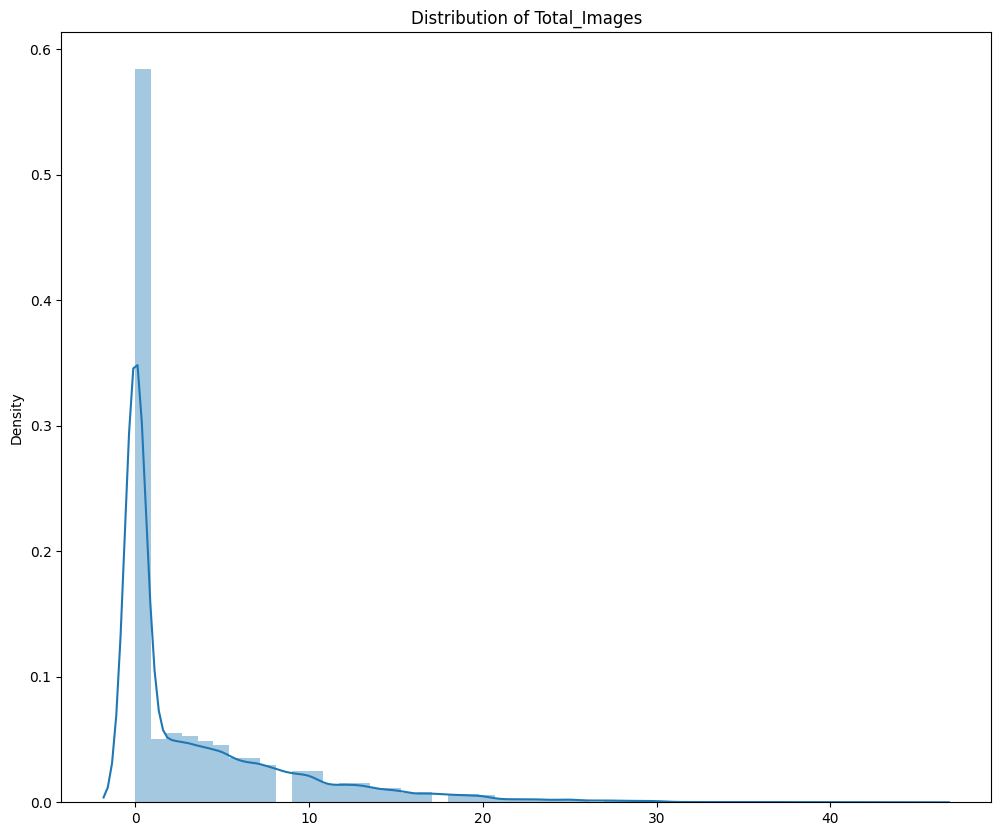

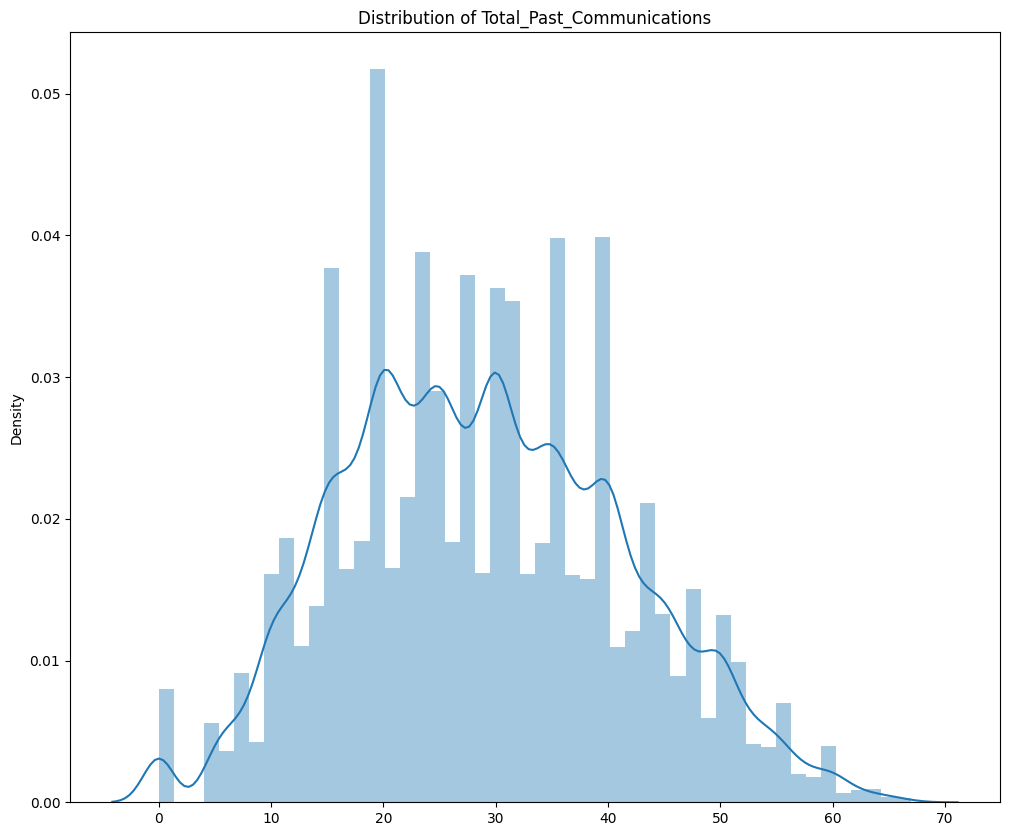

In [ ]:
#distribution of the continuous features and understanding the skweness of the data
continuous_variable = ['Word_Count','Subject_Hotness_Score','Total_Links','Total_Images','Total_Past_Communications']
for i  in (continuous_variable):
 sns.distplot(x=df[i], hist = True)
 plt.title(f'Distribution of {i}')
 plt.show()

The distribution plots revealed that Word Count and Total Past Communications exhibit a normal distribution. However, Total Links, Total Images, and the remaining variables are skewed to the right, suggesting the likely existence of outliers in these datasets.

#### Chart-3 Bar plot of categorical_variable with respect to the target variable(email status)(Bivariate Plot)

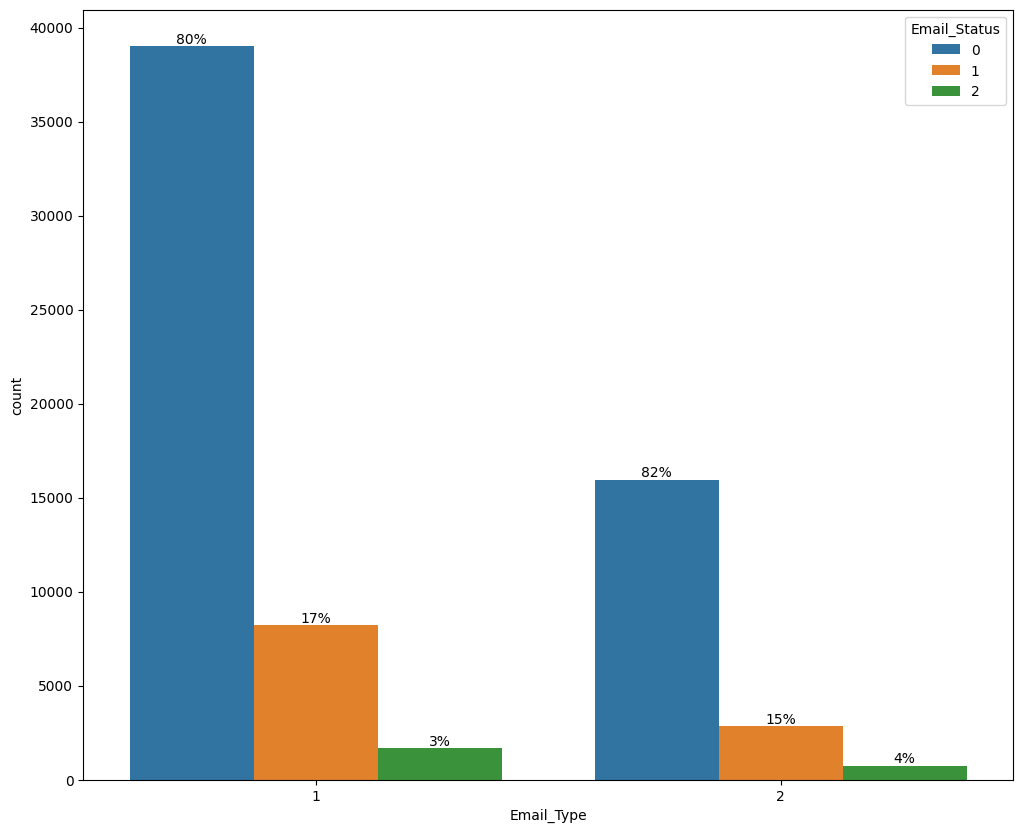

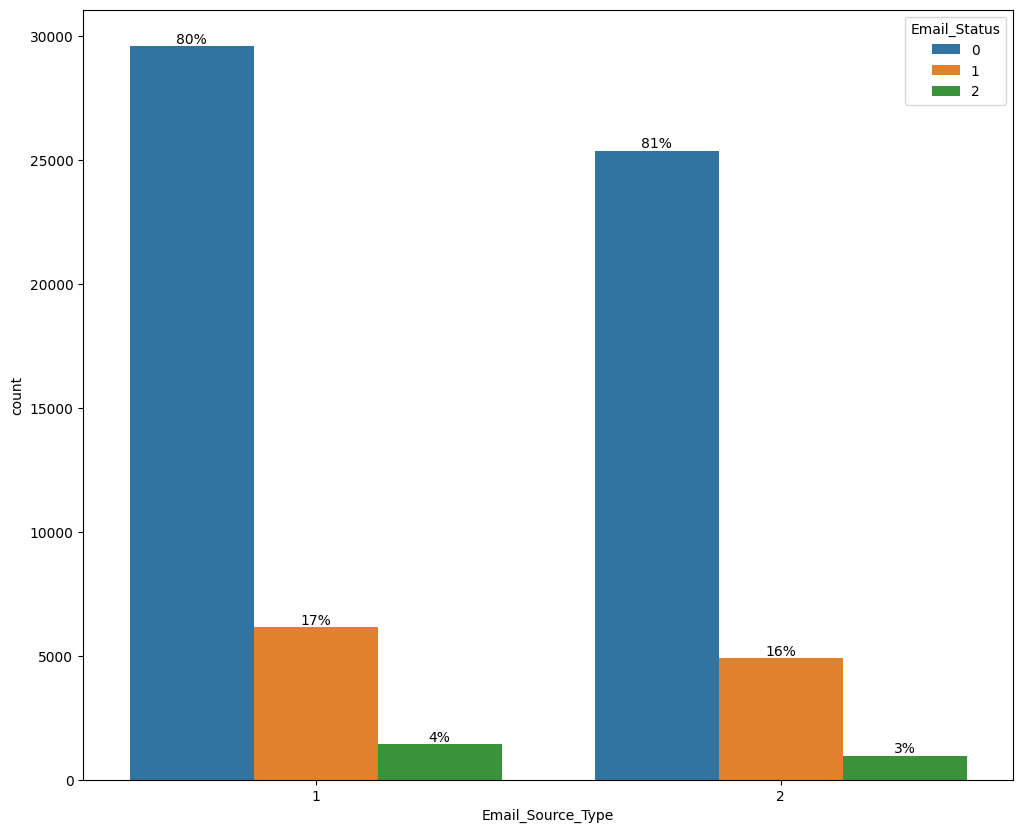

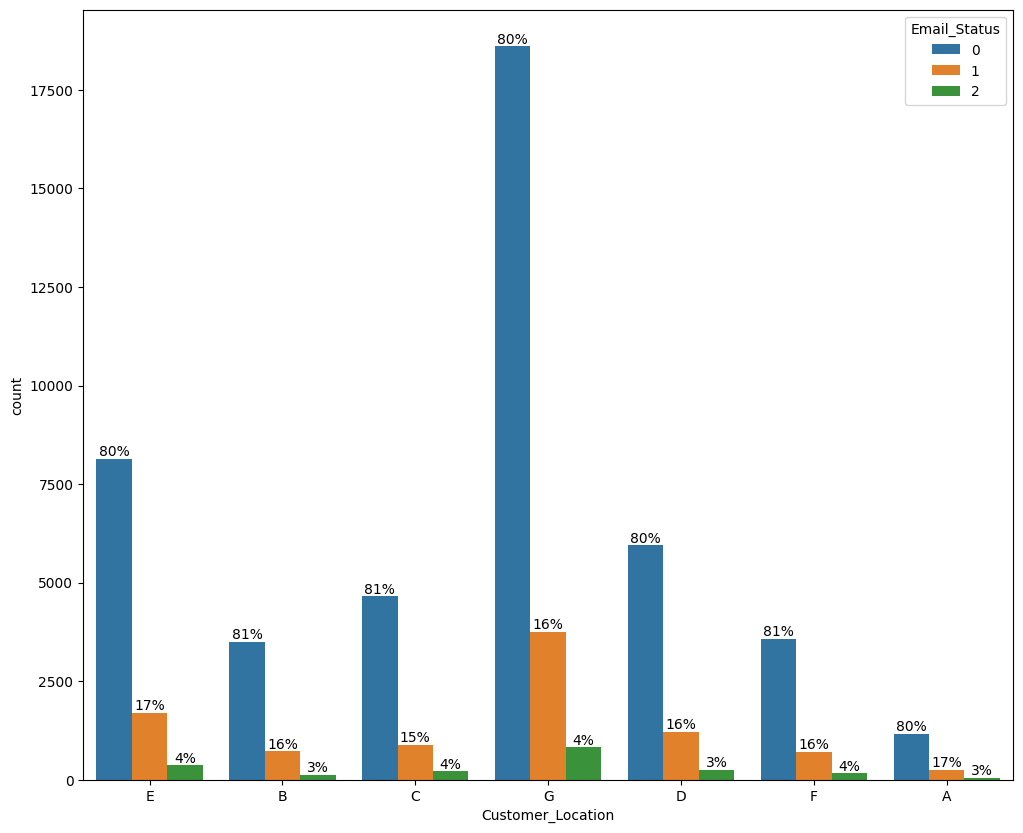

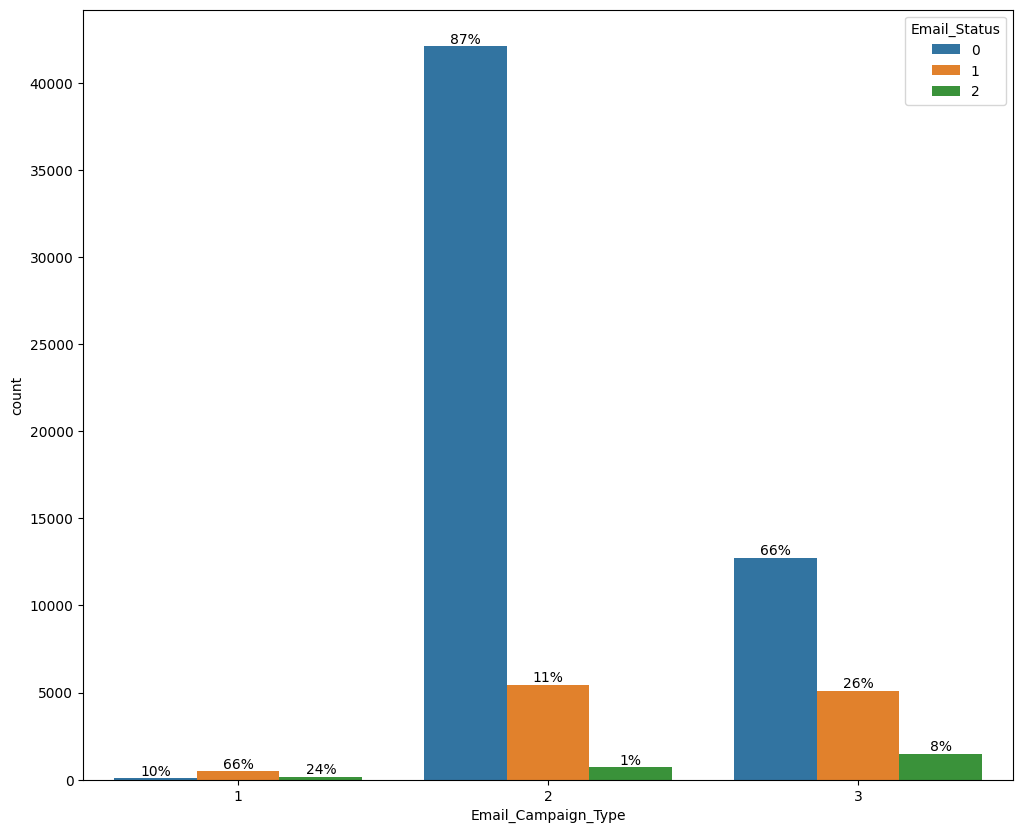

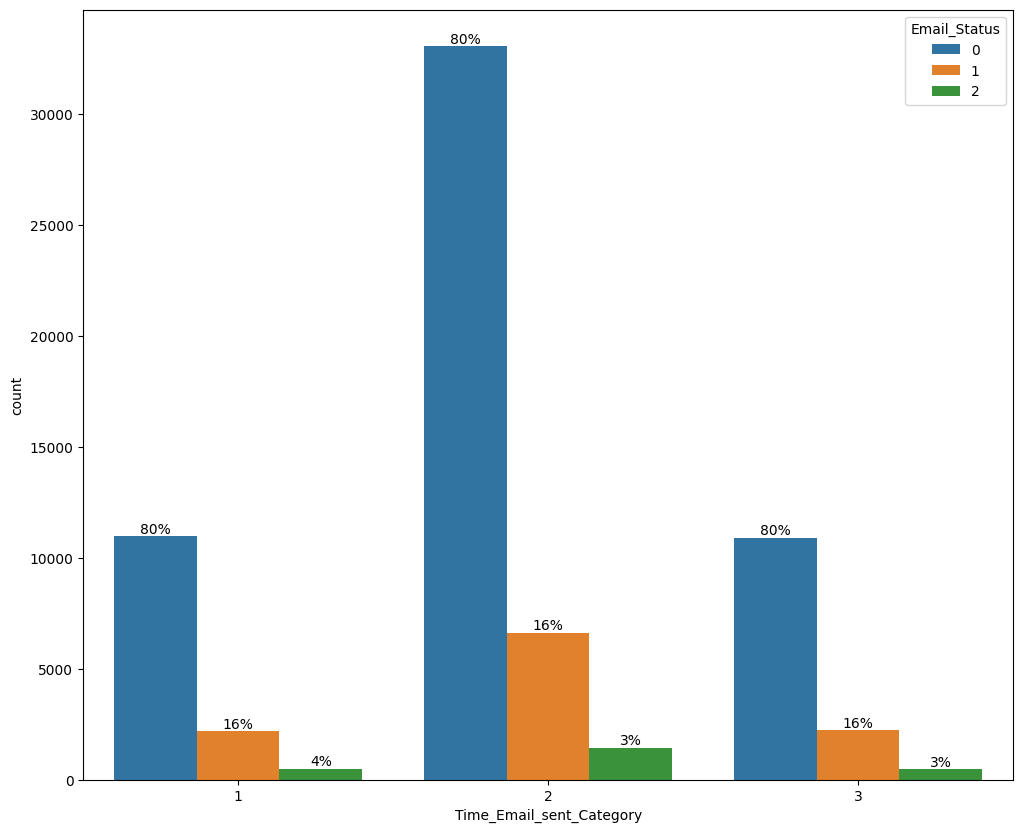

In [ ]:
import seaborn as sns
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']

for i,value in enumerate(categorical_variables):
  ax = sns.countplot(x=df[value], hue=df[Target_var[0]])
  unique = len([x for x in df[value].unique() if x==x])
  bars = ax.patches
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()


**Observation:**
1. **Email Type Impact:**
   - Type 1 (likely promotions) is sent more and gets higher reads and acknowledgments compared to Type 2.
   - Both types show similar proportions for ignored, read, and acknowledged emails.

2. **Email Source Type Pattern:**
   - Both categories in Email Source Type exhibit similar patterns.

3. **Customer Location Role:**
   - Location doesn't significantly affect email responses.
   - Similar response percentages across locations suggest location might not be a major factor.

4. **Email Campaign Type Insights:**
   - Type 1, with fewer emails, achieves higher read rates.
   - Type 2 has more emails but higher ignorance. Type 3 succeeds with fewer emails and more reads.

5. **Time Email Sent Observations:**
   - Category 2 (midday) receives more emails.
   - Midday emails might encourage reads due to work-related checks but may not be the primary reason for acknowledgments.





In [ ]:
import warnings
warnings.filterwarnings("ignore")


#### Chart -4-Box plot continuous variables and target(Email_Status)(Bivariate Plot)

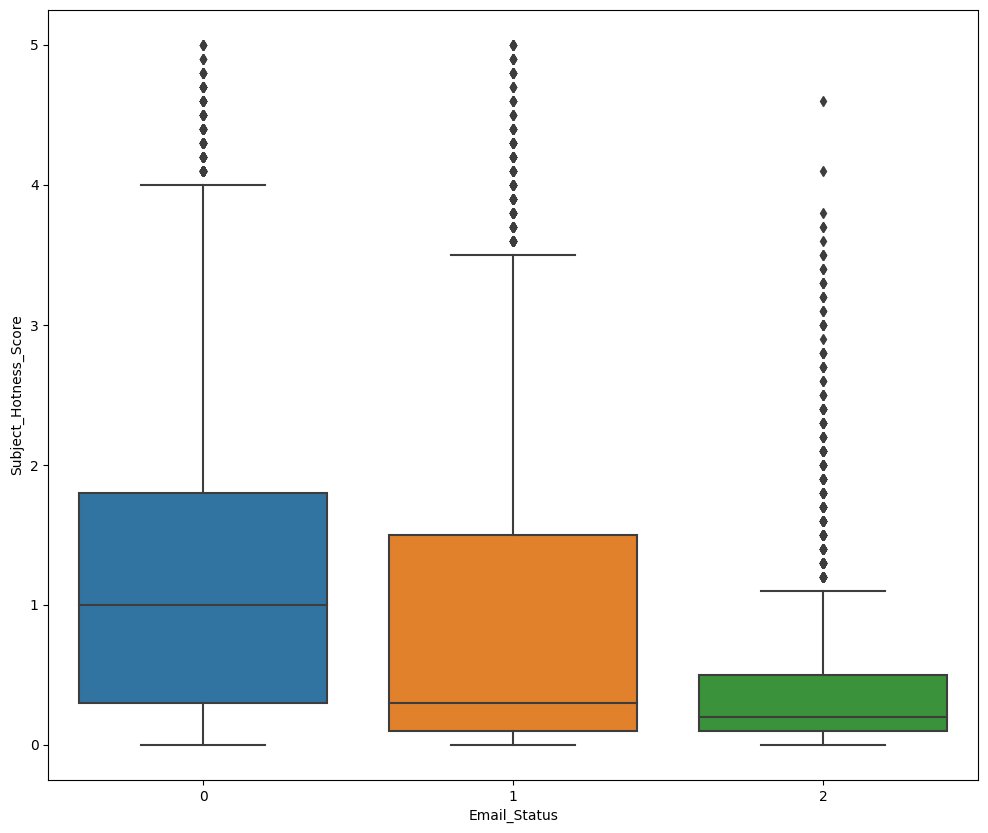

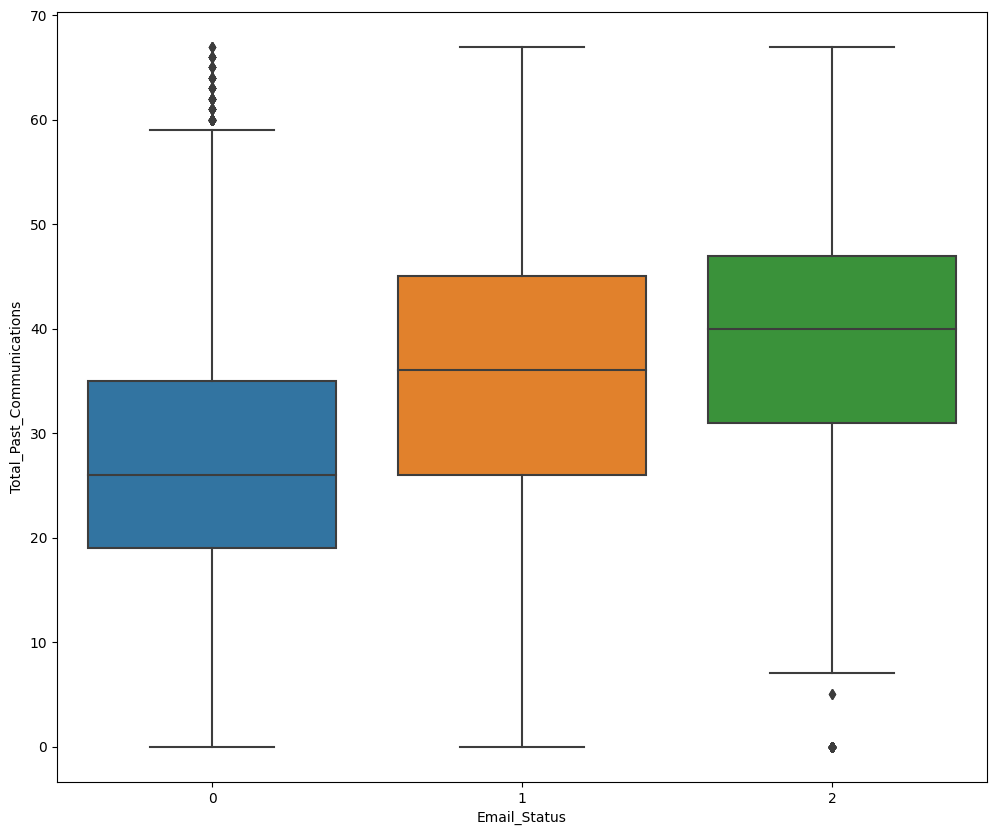

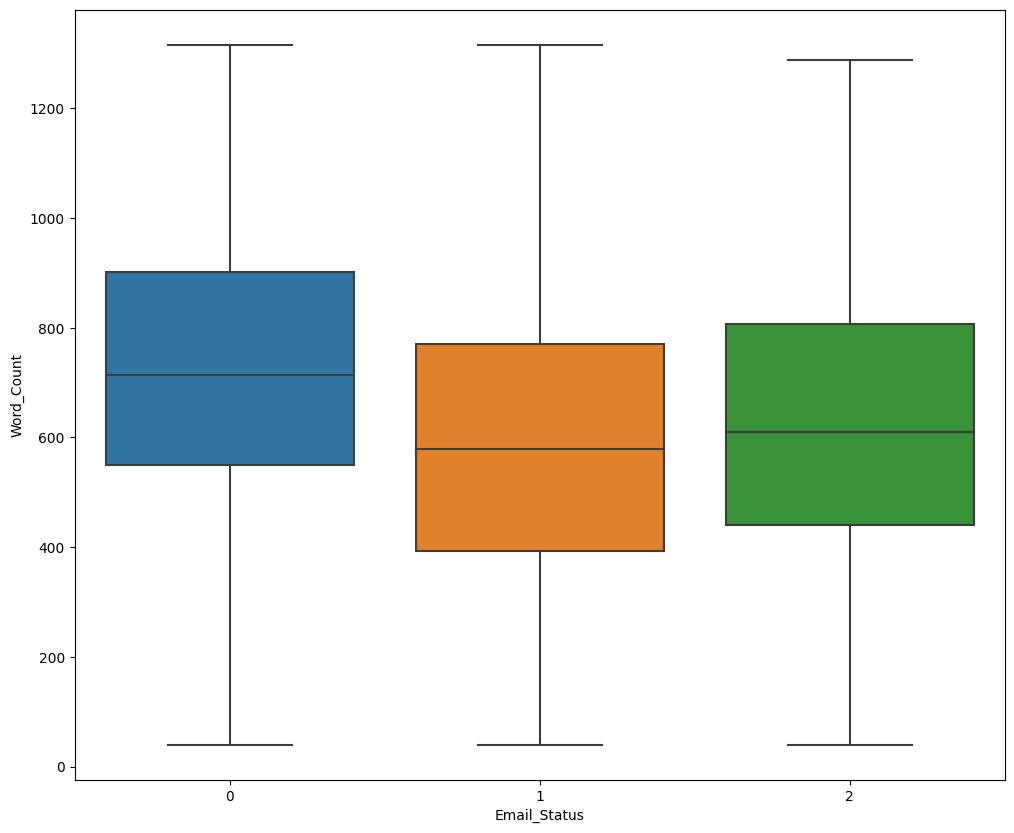

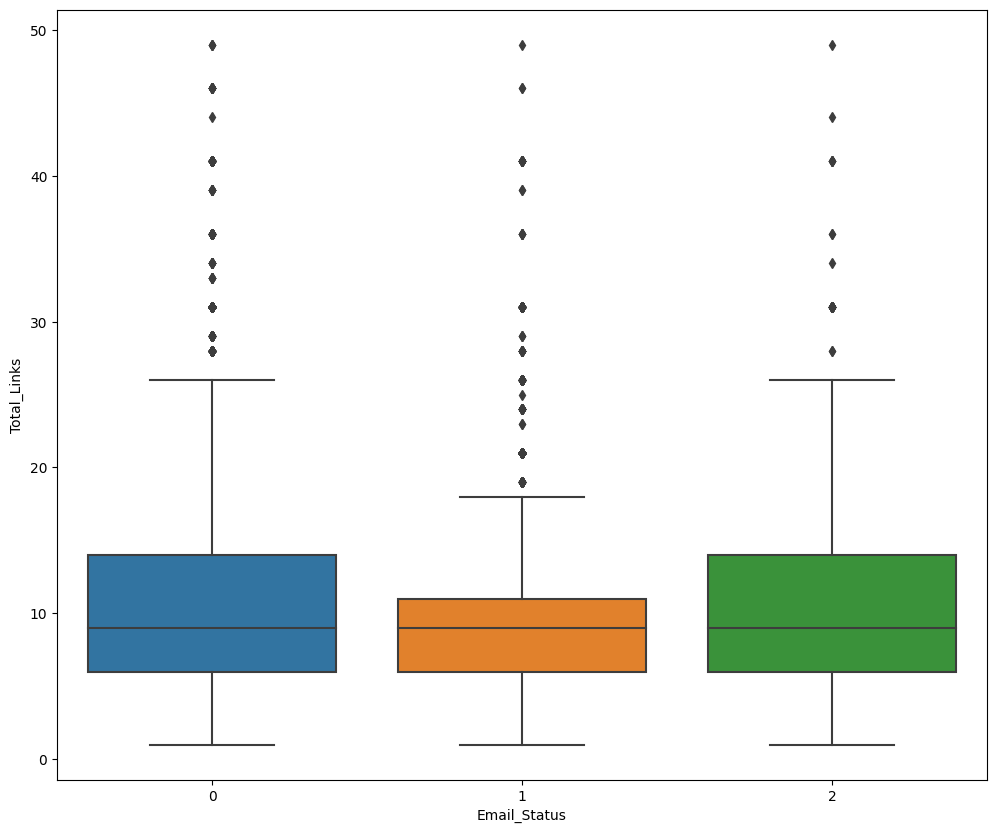

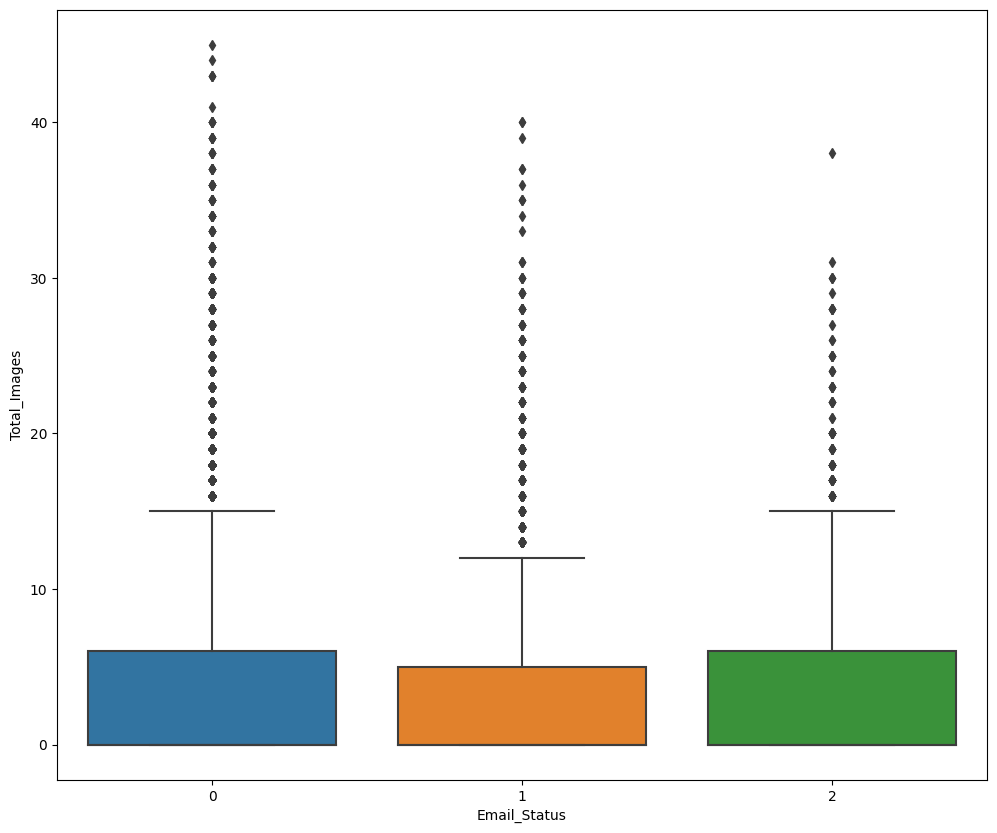

In [ ]:
#continuous variables through boxplots
continous_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(continous_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()


**Observation:**

In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.




####Chart-5-Correlation Heat map

**Correlation Analysis:**
To assess the level of correlation, positive or negative, between our features and the target variable, we'll create a correlation matrix.

In this analysis, we'll omit the 'Customer Location' and 'Email Id' features since they don't substantially impact the determination of whether a customer will disregard, read, or acknowledge the email.


<Axes: >

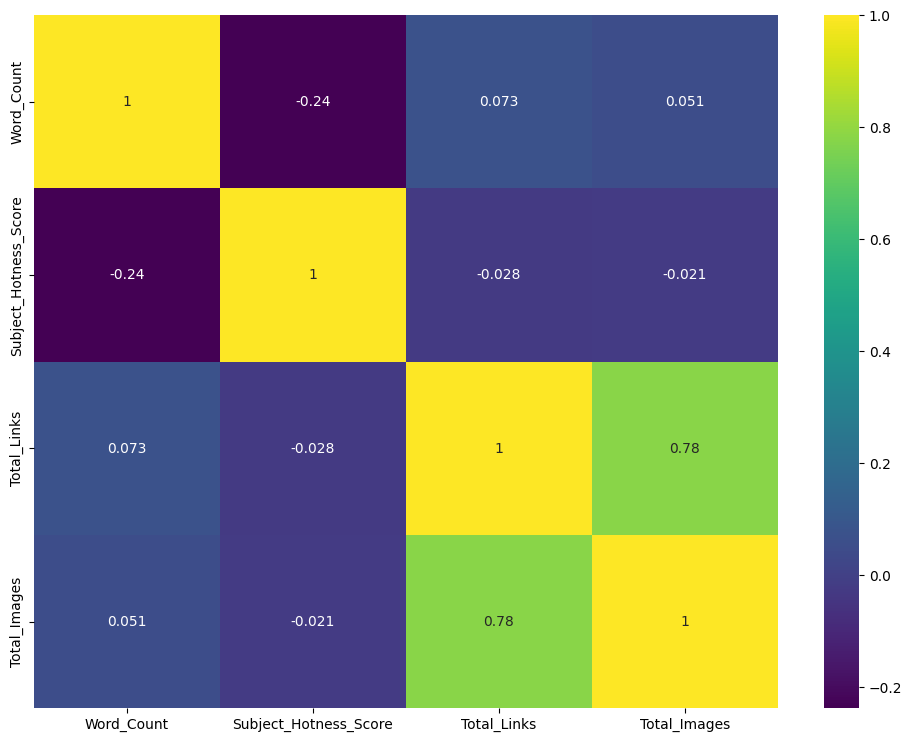

In [ ]:
#correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(df[['Word_Count','Subject_Hotness_Score','Total_Links','Total_Images']].corr(), cmap='viridis', annot=True)

**Observation:**
It confirms that the 'Email Campaign Type' and 'Total Past Communication' have a positive relationship with emails being read and acknowledged.

Word Count and Subject Hotness score are the most negatives amongst other.


## ***4. Feature Engineering & Data Pre-processing***

Data manipulation prepares the dataset for classification models by managing features, handling multicollinearity, outliers, and creating dummy variables if needed. We found outliers earlier and, due to class imbalance and overfitting risks, now aim to count outliers in each class to decide whether to keep or remove them.

### 1. Handling Missing Values

Before using raw data in models, it's important to look for and deal with missing, NaN (not-a-number), or strange values. This helps us understand the data better, get useful insights, and make accurate predictions. Fixing these issues helps improve how we understand the business and make better decisions based on the data.

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

1. Several columns, including "Customer Location," "Total Past Communications," "Total Links," and "Total Images," contain missing data.
2. The "Customer Location" column has a notably high number of missing values, posing a challenge because it's categorical and difficult to impute accurately.
3. To address this issue, the first step is to assess the impact of missing customer locations on our target variable.
4. We'll investigate whether the absence of customer location data influences the outcome we're trying to predict or if it's not correlated at all.
5. Meanwhile, we'll proceed to fill in the missing values in the other columns where feasible.
6. This approach allows us to decide later on how to handle the missing customer location data based on its relevance to our main objective.

In [ ]:
# Identifying columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
# Calculating the percentage of missing data for columns with missing values
missing_percentage = df[missing_columns].isnull().sum().sort_values(ascending=False) / len(df) * 100
# Displaying columns with missing data and their missing percentage
print("Columns with missing data and their missing percentage:")
print(missing_percentage)

Columns with missing data and their missing percentage:
Customer_Location            16.963411
Total_Past_Communications     9.984931
Total_Links                   3.220049
Total_Images                  2.453440
dtype: float64


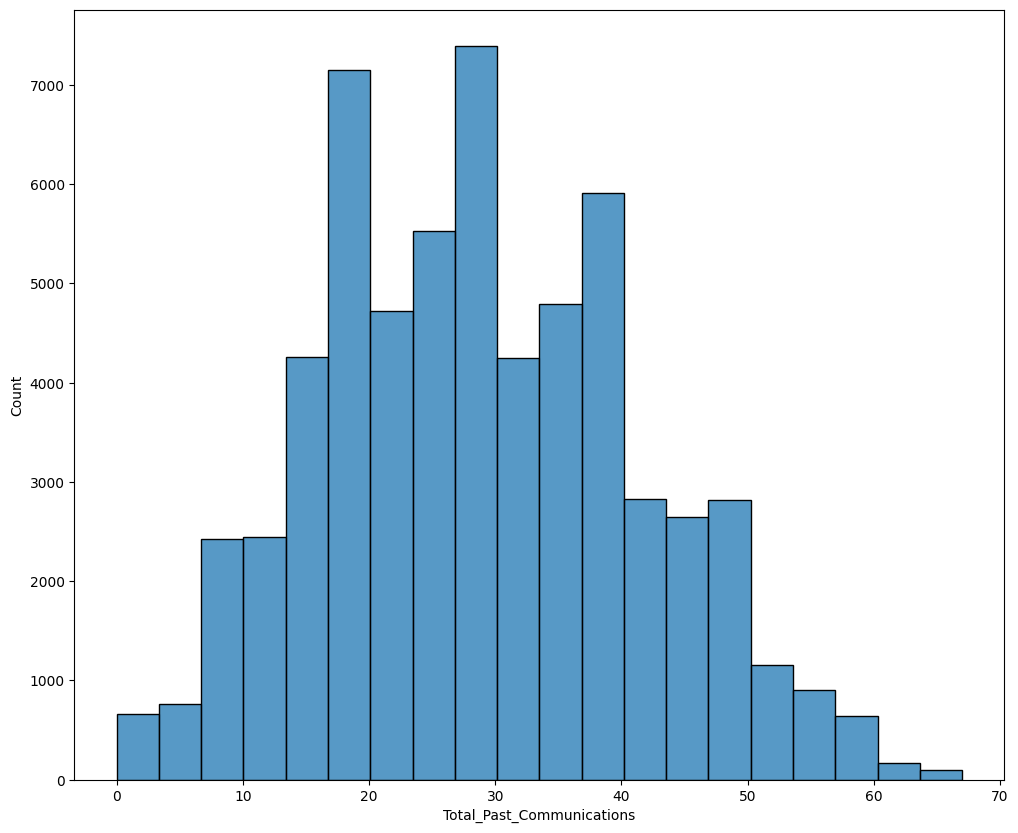

In [ ]:
#This code will generate a histogram showing the distribution of the 'Total Past Communications' column, helping us identify the most common values and guiding us in filling the missing data accordingly.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Total_Past_Communications', bins=20, kde=False)
plt.show()



In [ ]:
#filling up the null values for total past comm
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].median(), inplace = True)

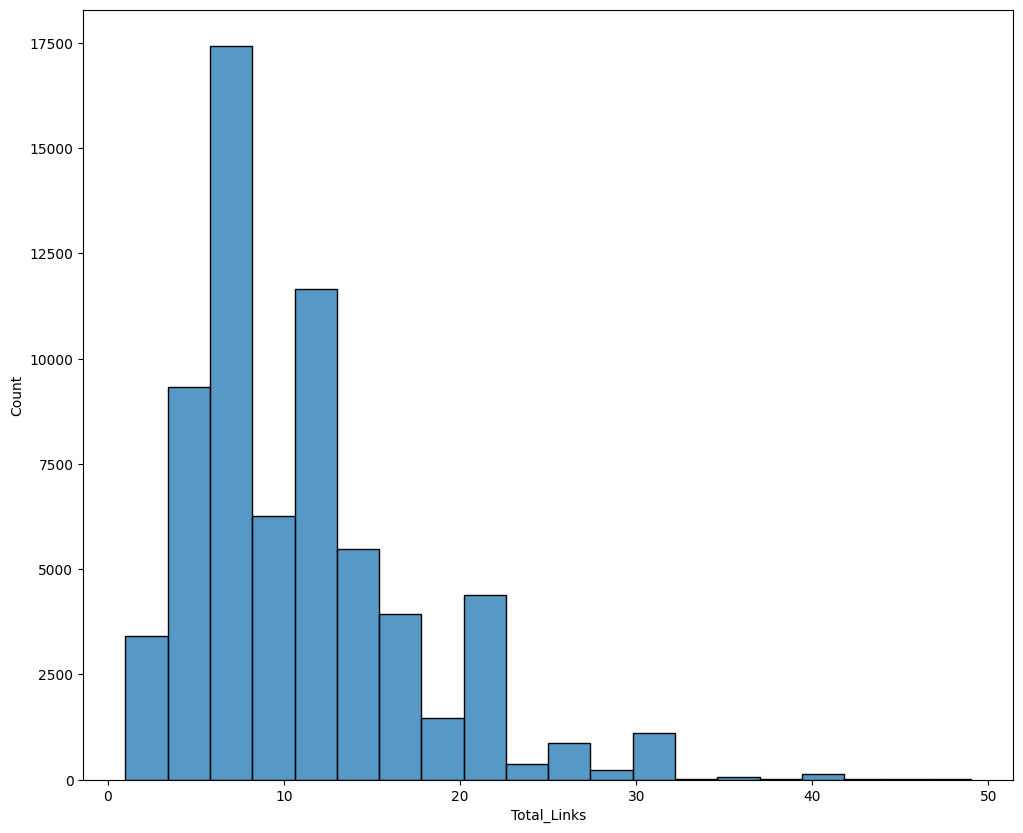

In [ ]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.histplot(data=df, x='Total_Links', bins=20, kde=False)
plt.show()

The majority of values in the 'Total Links' column fall within the range of 0 to 20, indicating a right-skewed distribution. Using the median would be more robust in such cases where there might be outlier effects..

In [ ]:
#filling up the Total Links Column
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

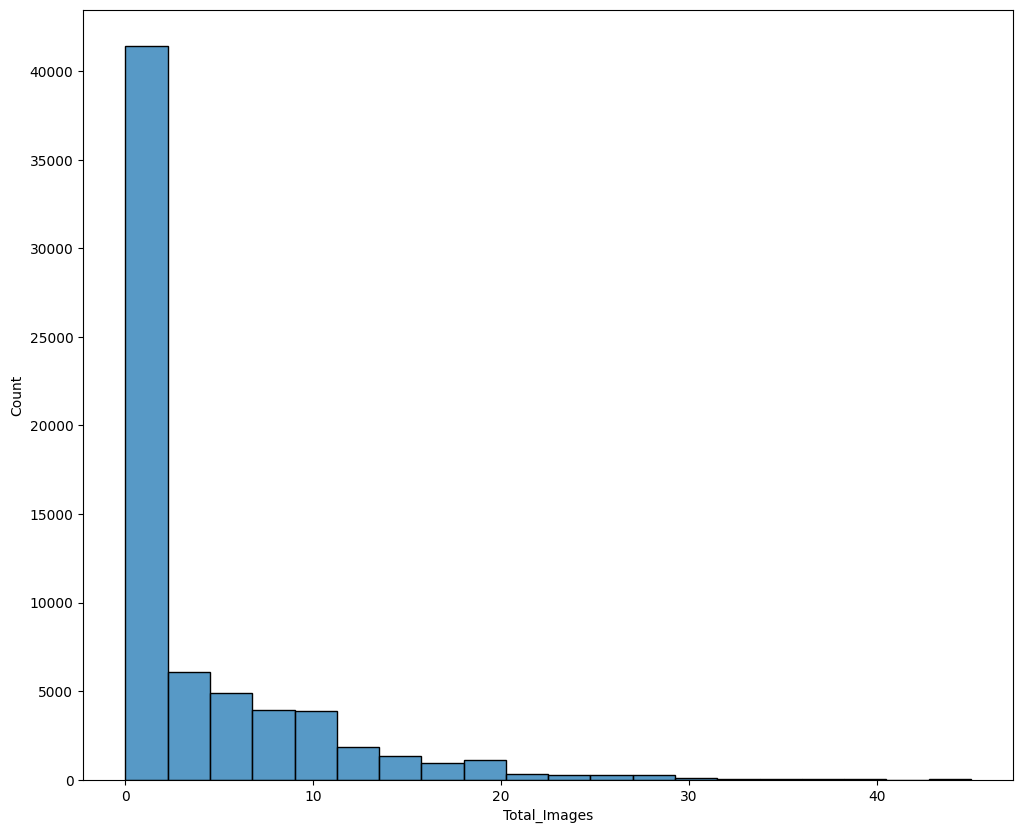

In [ ]:
#filling up the Total Images Column
sns.histplot(data=df, x='Total_Images', bins=20, kde=False)
plt.show()

In the dataset, most email entries have either 0 images or fewer than 3-4 images. It's a prudent approach to fill the missing values with the mode value, especially considering the frequency of occurrence.

In [ ]:
#filling up the Total Images Column
df['Total_Images'].fillna(df['Total_Images'].mode()[0], inplace = True)

NameError: ignored

We will remove the 'Customer Location' and 'Email Id' features from consideration as they have minimal impact on determining whether a customer will ignore, read, or acknowledge the email.

In [ ]:
df.drop(['Email_ID','Customer_Location'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

As we can see that we have fill up all NaN values and Drop the unnecessary columns(Email_ID,Customer_Location)

###**Multicollinearity and Feature Selection:**

As we can see from corelation matrix the total links and total images have corelation that is 0.75 so we can create new column by adding them or dop one column.

<Axes: xlabel='Total_Images', ylabel='Total_Links'>

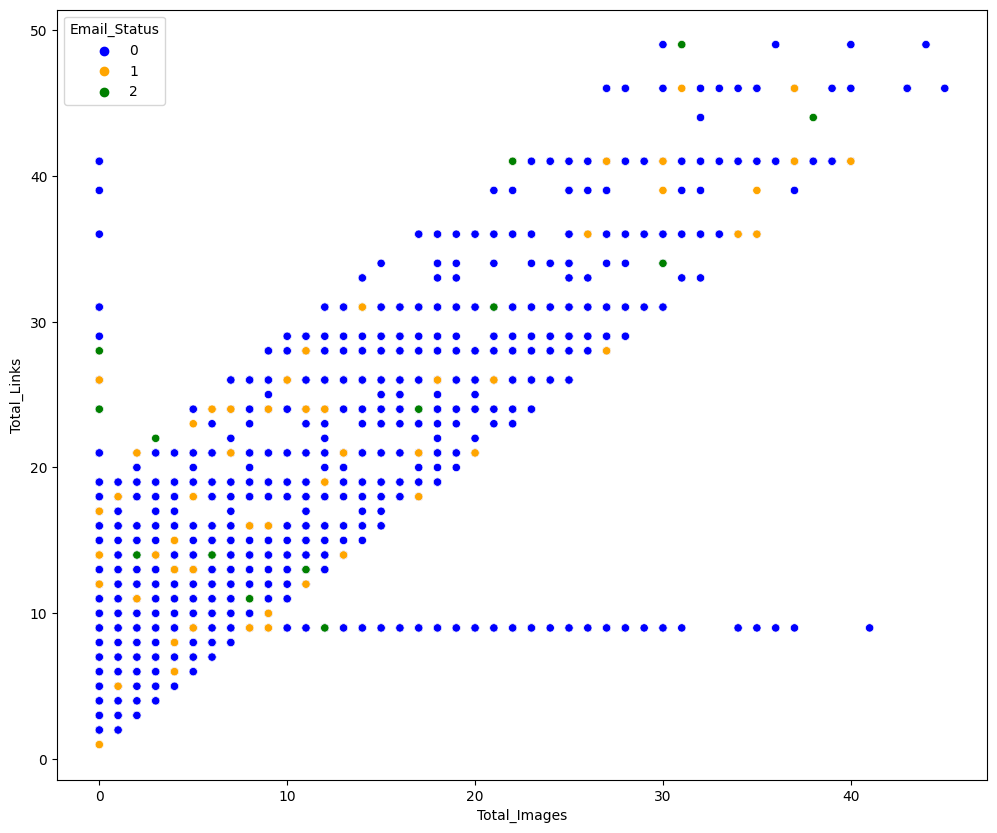

In [ ]:
import seaborn as sns

# Define a custom color palette
custom_palette = {0: "blue", 1: "orange", 2: "green"}

# Use the custom palette in the lineplot
sns.scatterplot(x='Total_Images', y='Total_Links', hue='Email_Status', palette=custom_palette, data=df)


In [ ]:
# Combine 'Total_Images' and 'Total_Links' into a new column 'Total_Img_links'
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']

# Drop the original 'Total_Images' and 'Total_Links' columns
df.drop(['Total_Images', 'Total_Links'], inplace=True, axis=1)

In [ ]:
df.head(3)


,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total_Img_links
0,1,2.2,2,2,33.0,1,440,0,8.0
1,2,2.1,1,2,15.0,2,504,0,5.0
2,2,0.1,1,3,36.0,2,962,1,5.0


In [ ]:
df.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Email_Status',
       'Total_Img_links'],
      dtype='object')

<Axes: >

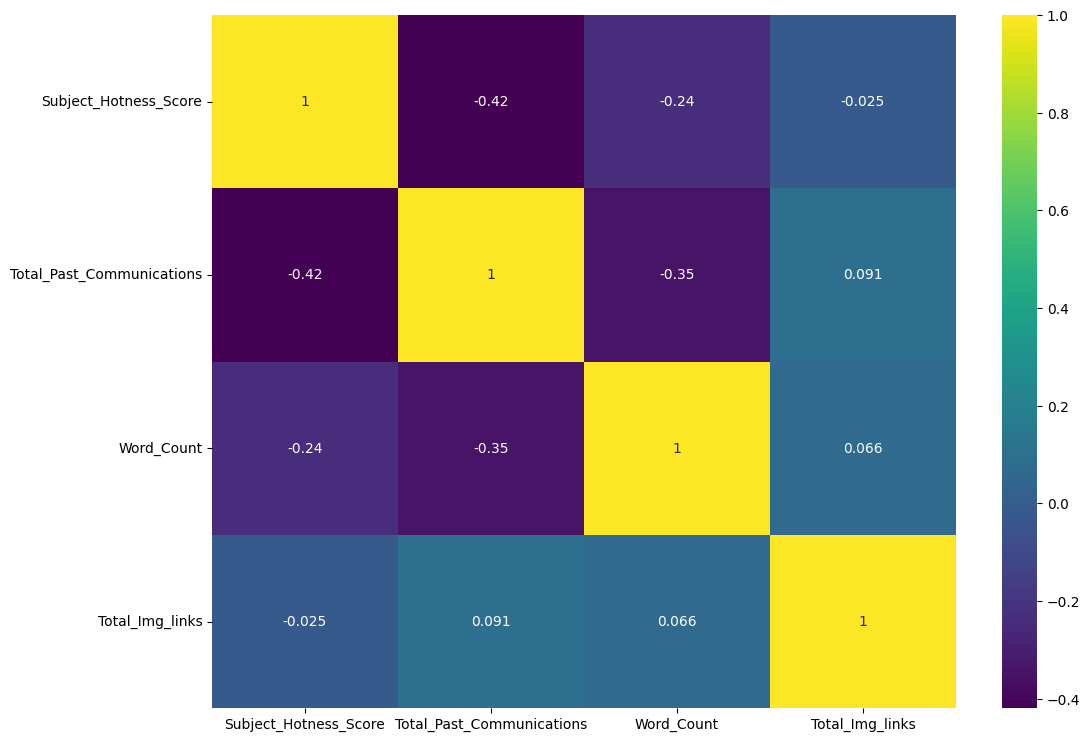

In [ ]:
#correlation matrix
plt.figure(figsize=(12,9))
sns.heatmap(df[['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']].corr(), cmap='viridis', annot=True)

AS we can see that we have removed or modified the higly corelated variable

###**Handling Outliers**

Upon examination using box plots, it was evident that, apart from the 'Word Count' variable, outliers were present in all other continuous variables. Nevertheless, eliminating these outliers could potentially lead to the loss of valuable data, especially considering the significant imbalance in our target variable. Therefore, it's crucial to handle outliers cautiously, ensuring that any removal doesn't exceed 5% of the data associated with the minority class. This approach aims to maintain data integrity while addressing the outlier issue in the dataset.

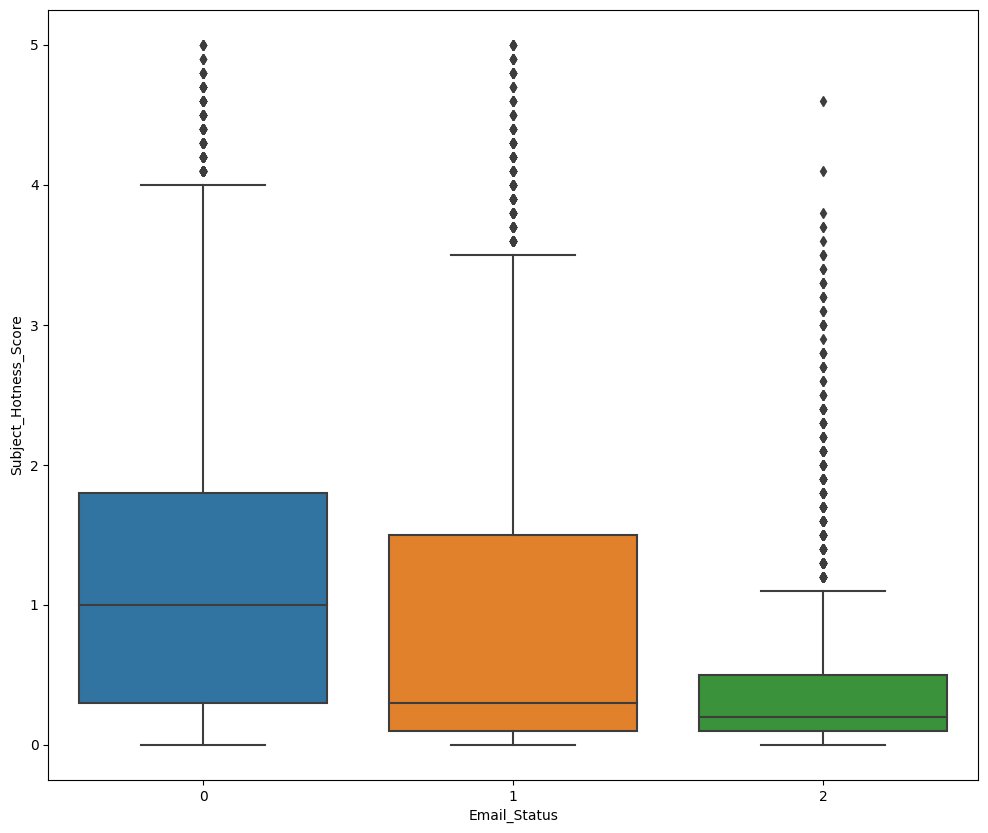

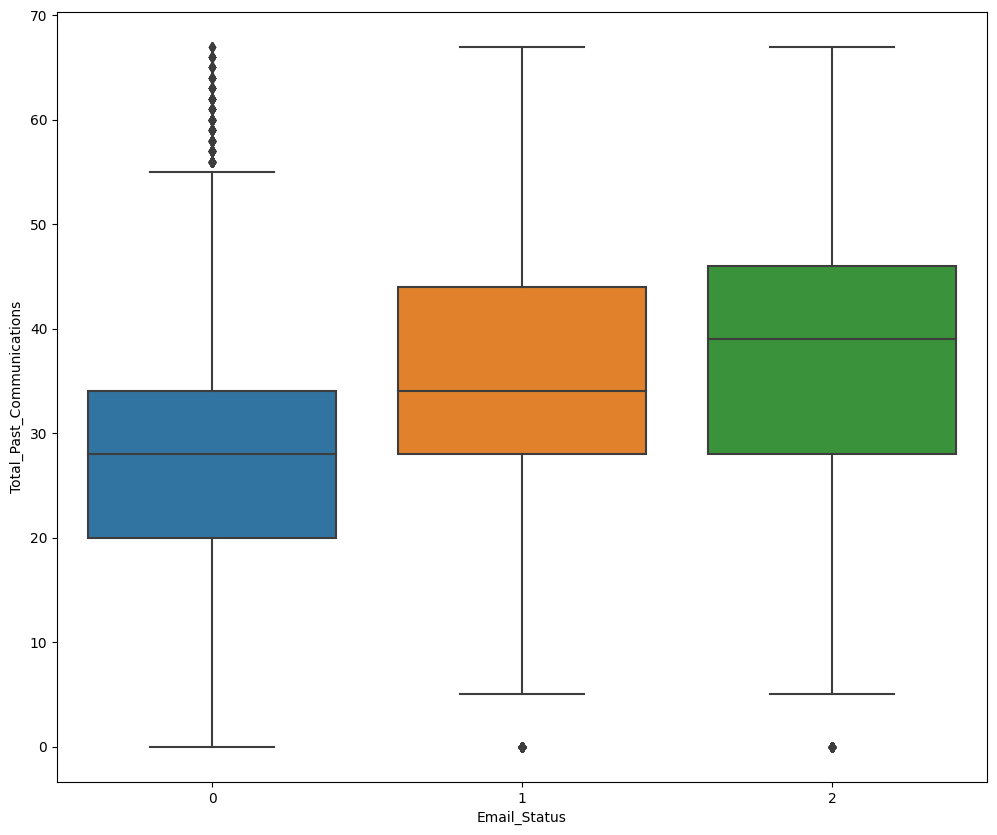

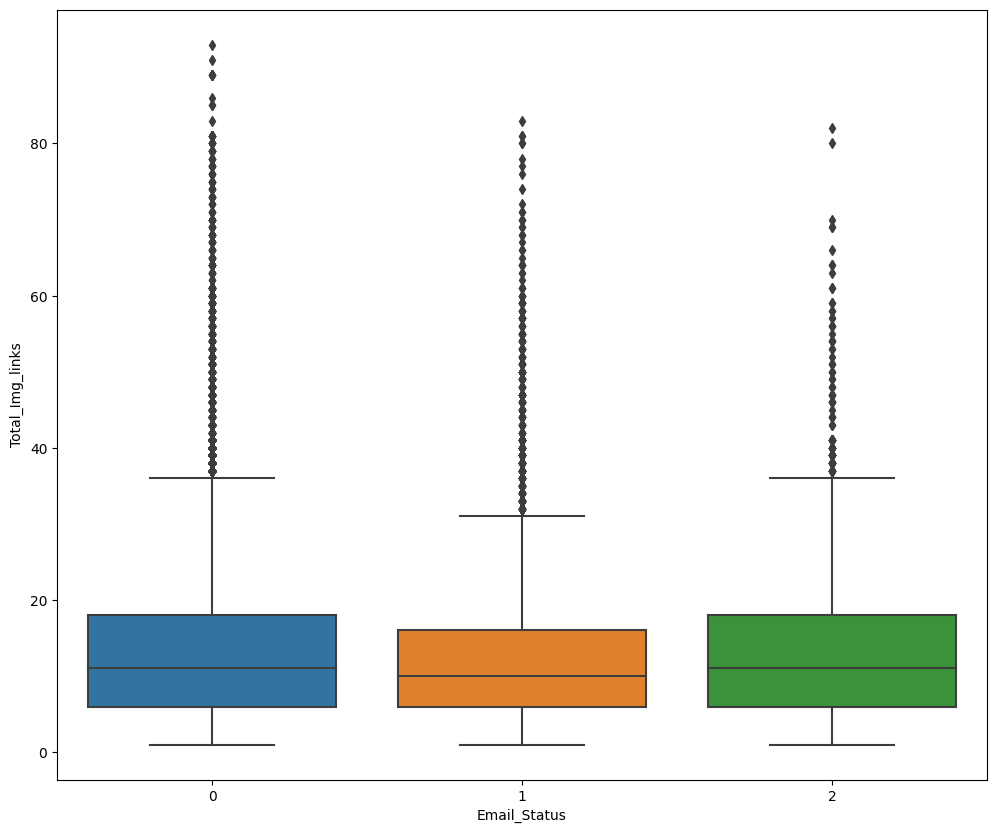

In [ ]:
#continuous variables through boxplots
continous_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Total_Img_links']
for i, value in enumerate(continous_var):
 sns.boxplot(x=df['Email_Status'], y= df[value])
 plt.show()

In [ ]:
out_var=['Subject_Hotness_Score','Total_Past_Communications','Total_Img_links']

In [ ]:
outliers = {}  # Dictionary to store outlier counts for each feature

for elem in out_var:  # Iterate through each feature in the specified list
    q25, q75 = np.percentile(df[elem], [25, 75])  # Calculate 25th and 75th percentiles
    IQR = q75 - q25  # Calculate the Interquartile Range (IQR)
    lower_bound = q25 - 1.5 * IQR  # Calculate lower bound for outliers
    upper_bound = q75 + 1.5 * IQR  # Calculate upper bound for outliers

    # Get indices of outlier rows based on the feature and 'Email_Status'
    outlier_indices = df[(df[elem] < lower_bound) | (df[elem] > upper_bound)].index

    outliers[elem] = {}  # Dictionary to store outlier counts for each Email_Status category

    # Count outliers for each Email_Status category in the outlier rows
    for i in outlier_indices:
        # Count outliers for each Email_Status category and store in 'outliers' dictionary
        outliers[elem][df.loc[i, 'Email_Status']] = outliers[elem].get(df.loc[i, 'Email_Status'], 0) + 1

print(outliers)  # Print the dictionary containing outlier counts for different features and Email_Status



{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3051, 1: 436, 2: 122}}


Upon identifying outliers specific to our minority classes labeled as 1 and 2 in the target variable, it's critical that when removing these outliers, we retain at least 95% of the valuable information related to these minority classes. This preservation ensures our model has sufficient data to accurately classify these less represented categories, preventing potential classification issues due to data loss.

In [ ]:
# Calculate the total number of outliers for minority and majority classes
total_minority_outliers = sum(outliers[col][1] for col in out_var)
total_majority_outliers = sum(outliers[col][0] for col in out_var)

# Calculate the total number of instances in minority and majority classes
total_minority_instances = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_majority_instances = df['Email_Status'].value_counts()[0]

# Calculate the percentage of outliers in minority and majority classes
minority_outlier_percentage = (total_minority_outliers / total_minority_instances) * 100
majority_outlier_percentage = (total_majority_outliers / total_majority_instances) * 100

# Calculate the total percentage of outliers
total_outliers = ((total_minority_outliers + total_majority_outliers) /
                  (total_minority_instances + total_majority_instances)) * 100

print(f'The percentage of outliers in the minority classes is {minority_outlier_percentage}')
print(f'The percentage of outliers in the majority class is {majority_outlier_percentage}')
print(f'The percentage of total outliers is {total_outliers}')


The percentage of outliers in the minority classes is 4.235013420817179
The percentage of outliers in the majority class is 5.984601663602774
The percentage of total outliers is 5.6413032346788


In [ ]:
df["Email_Status"].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

In [ ]:
columns_to_check = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Total_Img_links']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Set a multiplier for IQR to identify outliers (e.g., 1.5 times IQR)
threshold_multiplier = 1.5

# Define the lower and upper bounds to detect outliers for each column
lower_bound = Q1 - (threshold_multiplier * IQR)
upper_bound = Q3 + (threshold_multiplier * IQR)

# Iterate through each column and remove outliers based on 'Email_Status' condition
for elem in columns_to_check:
    df = df.drop(df[(df[elem] > upper_bound[elem]) & (df['Email_Status'] == 0)].index)
    df = df.drop(df[(df[elem] < lower_bound[elem]) & (df['Email_Status'] == 0)].index)



Lets check by box plot after removing outlier

In [ ]:
df_no_outliers1=df.copy()

In [ ]:
df_no_outliers1["Email_Status"].value_counts()

0    51657
1    11039
2     2373
Name: Email_Status, dtype: int64

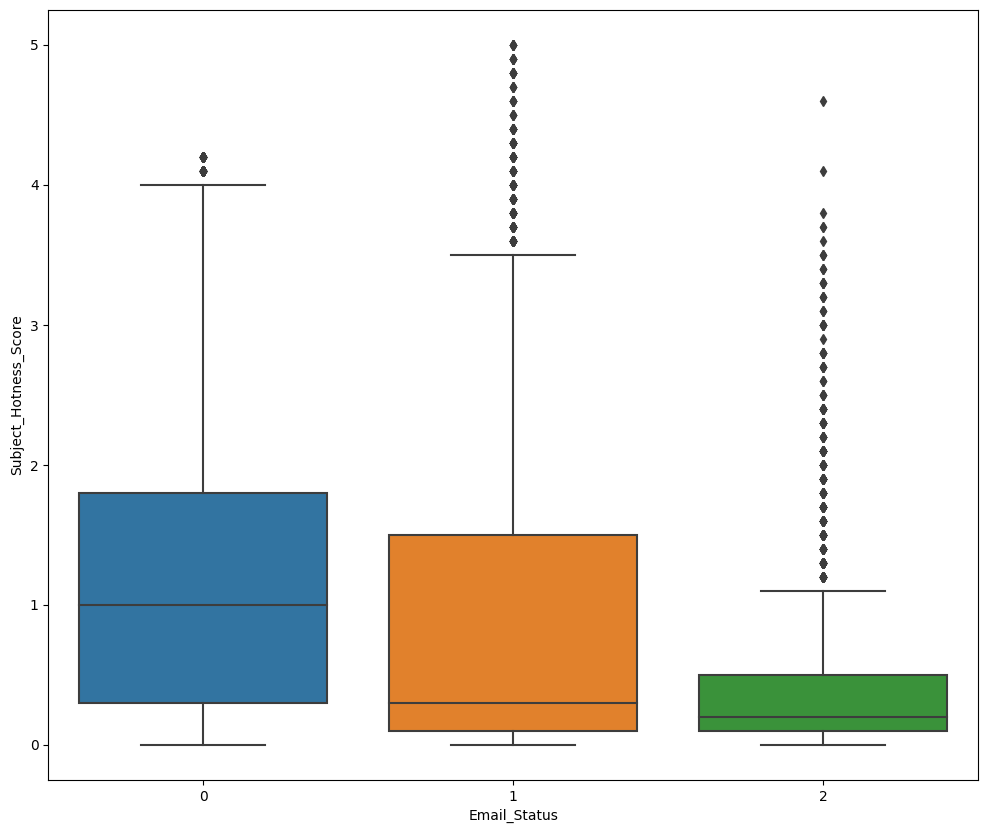

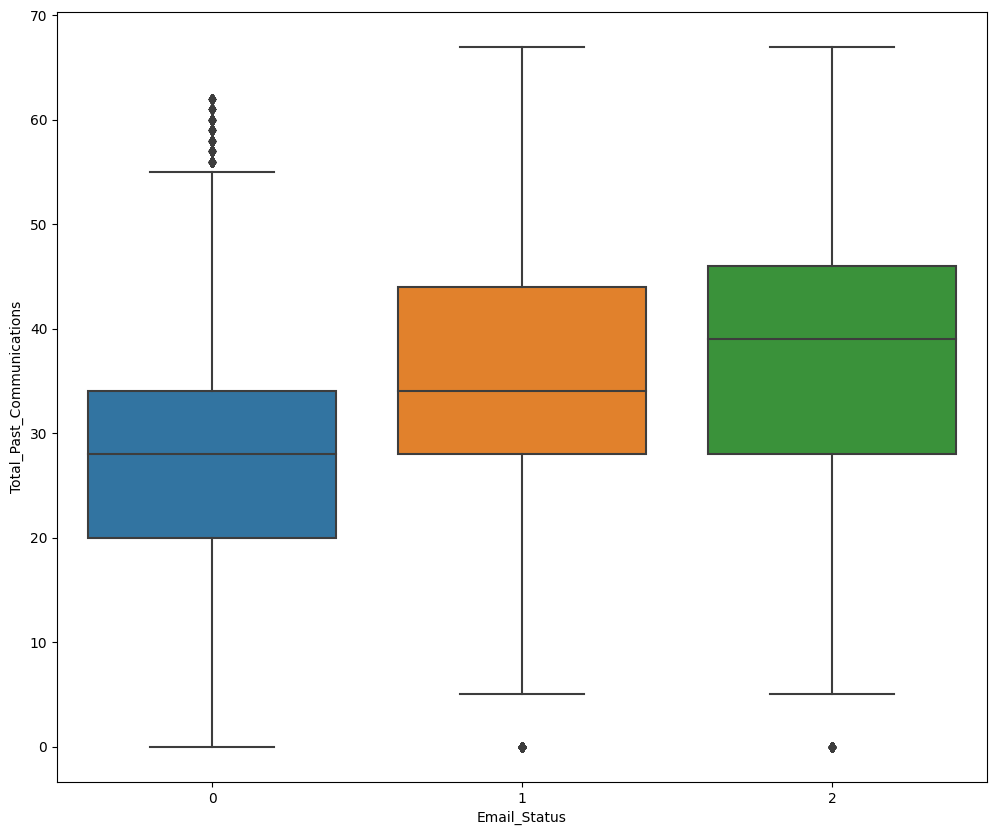

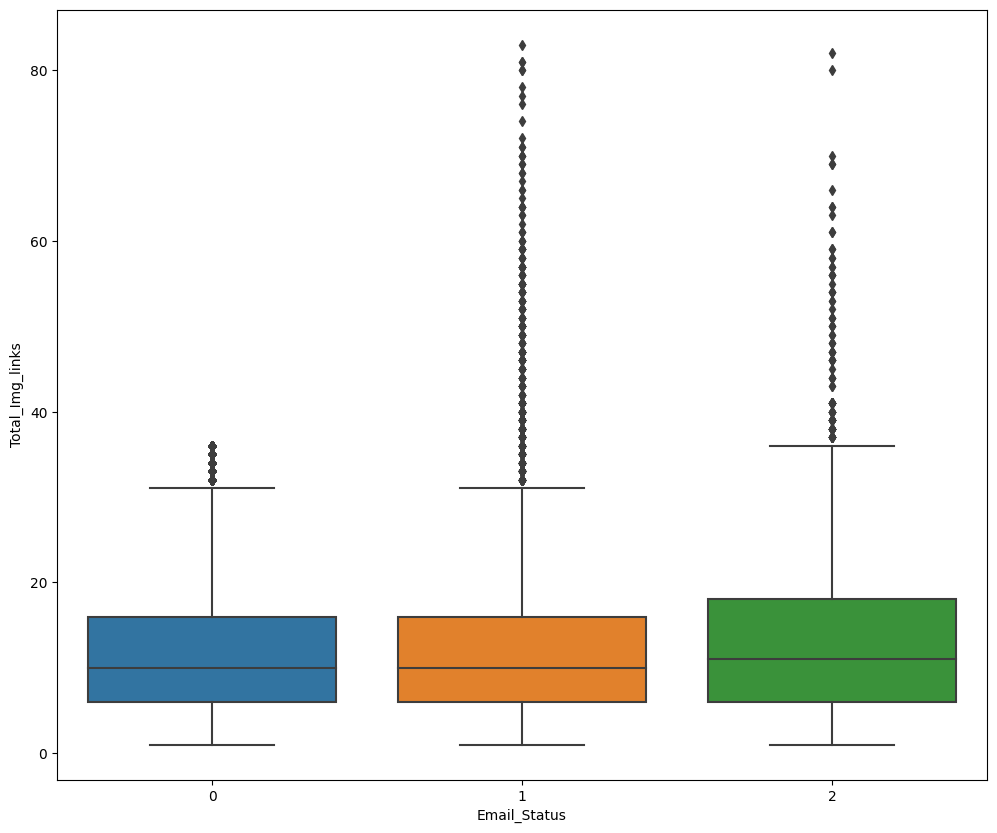

In [ ]:
#continuous variables through boxplots
continous_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Total_Img_links']
for i, value in enumerate(continous_var):
 sns.boxplot(x=df_no_outliers1['Email_Status'], y= df[value])
 plt.show()

 As we can see that we have almost removed the outliers

###**Data Scaling**


**Standardization (Z-score Normalization):**

Scales features to have a mean of 0 and standard deviation of 1.
Centers the data around 0, making it useful for algorithms that assume zero-centered data (e.g., many linear models, SVMs, PCA).
Less sensitive to outliers compared to Min-Max Scaling.
Preserves the shape of the original distribution but doesn't bound values to a specific range.

In [ ]:
df_no_outliers1.columns

Index(['Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Email_Status',
       'Total_Img_links'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']
df_no_outliers1[columns] = scaler.fit_transform(df_no_outliers1[columns])

NameError: ignored

In [ ]:
df2=df_no_outliers1

### **Data Splitting**

In [ ]:
#X and Y
X = df2.drop('Email_Status',axis=1)
y = df2['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (65069, 8)
Shape of Y: (65069,)


In [ ]:
#importing library to split
from sklearn.model_selection import train_test_split
#dividing the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(45548, 8)
(19521, 8)


In our approach, we are adopting a data splitting ratio of 80:20, indicating that 80% of the dataset is allocated for training, and the remaining 20% is reserved for testing. This widely accepted ratio in machine learning enables a substantial portion of the data to train the model effectively, while maintaining a significant segment for assessing the model's performance on new, unseen data. This strategy aims to ensure the model's ability to generalize to new instances and minimize the risk of overfitting to the training data.

###**Handling Class Imbalance in Data Set**

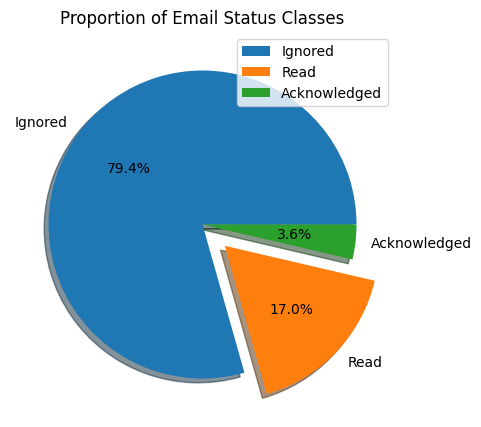

In [ ]:
import matplotlib.pyplot as plt

# Calculate class distribution
class_distribution = pd.DataFrame(y_train).value_counts()
labels = ['Ignored', 'Read', 'Acknowledged']

# Plotting the pie chart
plt.figure(figsize=(7, 5), dpi=100)
plt.pie(class_distribution, labels=labels, explode=(0, 0.2, 0), shadow=True, autopct='%1.1f%%')
plt.title('Proportion of Email Status Classes')
plt.legend()
plt.show()


In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)
print('Original dataset shape', len(y_train))
print('Resampled dataset shape', len(y_train_s))

Original dataset shape 45548
Resampled dataset shape 108480


In [ ]:
s=pd.DataFrame(y_train_s)

In [ ]:
s.value_counts()

Email_Status
0               36160
1               36160
2               36160
dtype: int64

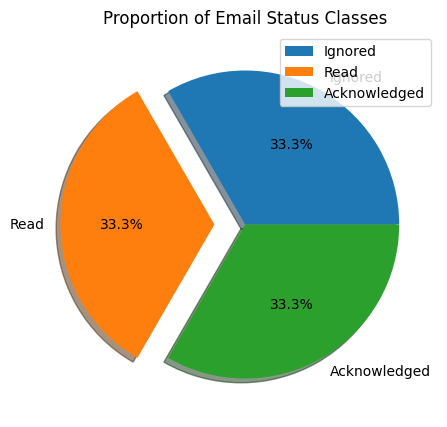

In [ ]:

# Calculate class distribution
class_distribution =s['Email_Status'].value_counts()
labels = ['Ignored', 'Read', 'Acknowledged']
# Plotting the pie chart
plt.figure(figsize=(7, 5), dpi=100)
plt.pie(class_distribution, labels=labels, explode=(0, 0.2, 0), shadow=True, autopct='%1.1f%%')
plt.title('Proportion of Email Status Classes')
plt.legend()
plt.show()

SMOTE, which stands for Synthetic Minority Over-sampling Technique, serves as a widely used approach in machine learning for addressing class imbalance. Its primary goal is to rectify class distribution disparities by producing synthetic samples for the minority class. These synthetic instances are generated by interpolating among the available minority class samples. The interpolation process involves selecting multiple nearest neighbors within the minority class and computing a linear combination of their feature values. Through this technique, new samples akin to the existing minority class instances are generated, thereby augmenting the overall number of minority class samples and achieving a more balanced class distribution in the dataset.

## ***7. ML Model Implementation***

### Model - 1 - **Logistic Regression**

In [ ]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logis= LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logis.fit(X_train_s, y_train_s)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
#Function to evaluate the model
#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report
def model_evaluation_metrics(model_name,model, X_train_s, y_train_s, X_test, y_test):

  #Making predictions
  y_pred_train = model.predict(X_train_s)
  y_pred_test = model.predict(X_test)
  #probs
  train_proba = model.predict_proba(X_train_s)
  test_proba = model.predict_proba(X_test)

  #Evaluation
  #Accuracy
  accuracy_train = accuracy_score(y_train_s,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)
  #Confusion Matrix
  cm_train = confusion_matrix(y_train_s,y_pred_train)
  cm_test = confusion_matrix(y_test,y_pred_test)
  cm_test1 = confusion_matrix(y_test,y_pred_test,normalize='true')

  #Recall
  train_recall = recall_score(y_train_s,y_pred_train, average='weighted')
  test_recall = recall_score(y_test,y_pred_test, average='weighted')

  #Precision
  train_precision = precision_score(y_train_s,y_pred_train, average='weighted')
  test_precision = precision_score(y_test,y_pred_test,average='weighted')

  #F1 Score
  train_f1 = f1_score(y_train_s,y_pred_train, average='weighted')
  test_f1 = f1_score(y_test,y_pred_test, average='weighted')
  #AUC
  train_auc = roc_auc_score(y_train_s, train_proba, multi_class='ovr')
  test_auc = roc_auc_score(y_test, test_proba, multi_class='ovr')

  # Visualizing Results
  print("------------- Evaluation -------" + str(model_name) + '-----')
  print("---------------Test data ---------------\n")
  print("Classification_report")
  labels = ['0', '1', '2']
  plt.figure(figsize=(4, 3))
  ax = plt.subplot()
  #sns.heatmap(cm_test, annot=True, ax=ax,fmt='d')  # annot=True to annotate cells
  sns.heatmap(cm_test1, annot=True, ax=ax)
  # labels, title, and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  print(classification_report(y_test, y_pred_test))

  # create ROC curve
  plt.figure(figsize=(8, 6))
  for i in range(3):
    fpr, tpr, _ = roc_curve(y_test, test_proba[:, i], pos_label=i)
    plt.plot(fpr, tpr, linestyle='--', label=f'Class {i} vs Others')

  plt.title('Multiclass ROC curve of ' + str(model))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc='lower right')
  plt.show()


  # Saving our results
  return model_name,accuracy_train,accuracy_test, train_precision,test_precision,train_recall,test_recall, train_f1,test_f1, train_auc,test_auc

------------- Evaluation -------Logistic_Regression-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     15497
           1       0.25      0.23      0.24      3312
           2       0.07      0.61      0.13       712

    accuracy                           0.54     19521
   macro avg       0.40      0.48      0.36     19521
weighted avg       0.75      0.54      0.62     19521



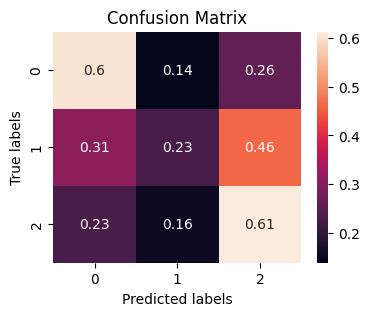

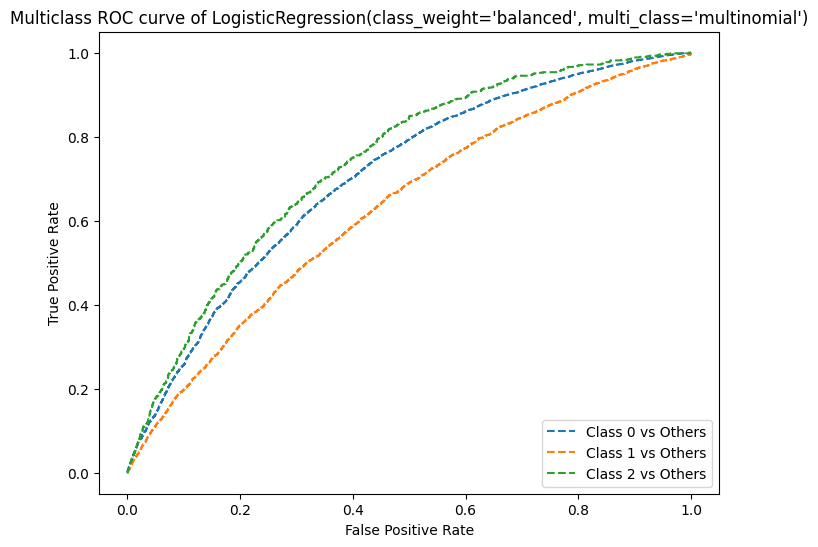

('Logistic_Regression',
 0.49926253687315636,
 0.5394703140207981,
 0.4923447486370706,
 0.7501046208389568,
 0.49926253687315636,
 0.5394703140207981,
 0.47858153760605404,
 0.6152274976453496,
 0.6847349557063248,
 0.6898413060295764)

In [ ]:
logistic_ = model_evaluation_metrics('Logistic_Regression',logis, X_train_s, y_train_s, X_test, y_test)
logistic_

In [ ]:
metrics_table = pd.DataFrame(columns=['Model','Train_Accuracy', 'Test_Accuracy', 'Train_Precision', 'Test_Precision',
                                      'Train_Recall', 'Test_Recall', 'Train_F1Score', 'Test_F1Score', 'Train_ROC_AUC', 'Test_ROC_AUC'])

In [ ]:
metrics_table.loc[0]=list(logistic_)

In [ ]:
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.53947,0.492345,0.750105,0.499263,0.53947,0.478582,0.615227,0.684735,0.689841


####**Logistic Regression** with Hypertuning

In [ ]:
# initialize hyperparameters for logistic regression
logis_hyp= LogisticRegression(multi_class='multinomial', class_weight='balanced')
parameters = {'solver':['lbfgs', 'newton-cg', 'saga'],
              'C':[0.01, 0.1, 1],
              'max_iter':[50, 80, 100]}

Best Parameters: {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.01}
------------- Evaluation -------Logistic_Regression_RV-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     15497
           1       0.25      0.23      0.24      3312
           2       0.07      0.61      0.13       712

    accuracy                           0.54     19521
   macro avg       0.40      0.48      0.36     19521
weighted avg       0.75      0.54      0.62     19521



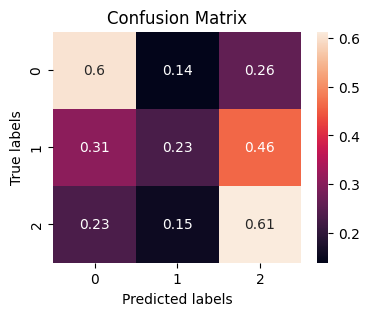

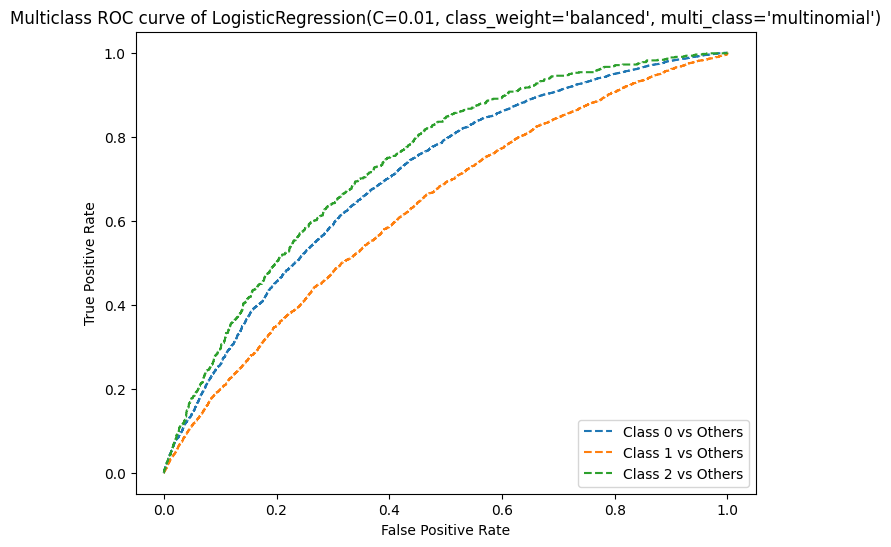

('Logistic_Regression_RV',
 0.49934550147492623,
 0.5393678602530608,
 0.49236839734376514,
 0.749855217487145,
 0.49934550147492623,
 0.5393678602530608,
 0.4783820433004832,
 0.615083793905039,
 0.6847317751926459,
 0.6899685049844887)

In [ ]:
# train data with logistic regression on random search cv
from sklearn.model_selection import RandomizedSearchCV
log_RV = RandomizedSearchCV(logis_hyp, parameters, cv=5, n_iter=10)
log_RV.fit(X_train_s, y_train_s)
print("Best Parameters:", log_RV.best_params_)
best_logis=log_RV.best_estimator_
logistic_RV= model_evaluation_metrics('Logistic_Regression_RV',best_logis, X_train_s, y_train_s, X_test, y_test)
logistic_RV


In [ ]:
metrics_table.loc[1]=list(logistic_RV)

In [ ]:
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969


###Model -2-**Decision Tree**
Decision trees are powerful models used for classification tasks in machine learning. They construct a tree-like structure by recursively partitioning the feature space based on the most informative features to make decisions. At each node, the algorithm selects the feature that best separates the classes or reduces uncertainty (measured by entropy or Gini impurity). This process continues until a stopping criterion is met, such as reaching a maximum depth or purity threshold. Decision trees are easy to interpret, handle both numerical and categorical data, and can capture complex decision boundaries. However, they tend to overfit, especially with deep trees, and techniques like pruning or using ensemble methods (e.g., Random Forests) are employed to mitigate this issue and improve generalization.

------------- Evaluation -------Decision Tree-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     15497
           1       0.29      0.32      0.30      3312
           2       0.10      0.16      0.12       712

    accuracy                           0.70     19521
   macro avg       0.41      0.43      0.42     19521
weighted avg       0.73      0.70      0.71     19521



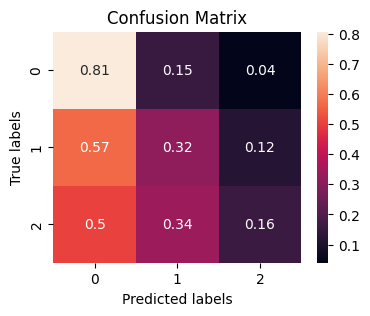

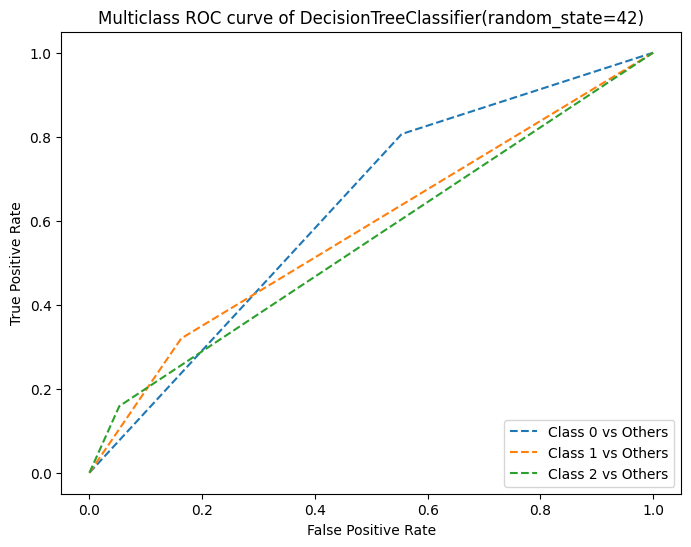

('Decision Tree',
 0.9994469026548672,
 0.7003227293683725,
 0.9994473854743061,
 0.7259703763433887,
 0.9994469026548672,
 0.7003227293683725,
 0.9994469331189847,
 0.7123667337546725,
 0.999999666040965,
 0.5858087565581097)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
# Fit the classifier to the training data
decision_tree.fit(X_train_s, y_train_s)
DT= model_evaluation_metrics('Decision Tree',decision_tree, X_train_s, y_train_s, X_test, y_test)
DT

In [ ]:
metrics_table.loc[2]=list(DT)
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969
2,Decision Tree,0.999447,0.700323,0.999447,0.725970,0.999447,0.700323,0.999447,0.712367,1.000000,0.585809


####-Decision Tree with Hypertuning

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
------------- Evaluation -------Decision Tree RS-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     15497
           1       0.29      0.32      0.31      3312
           2       0.10      0.21      0.14       712

    accuracy                           0.69     19521
   macro avg       0.42      0.44      0.42     19521
weighted avg       0.73      0.69      0.71     19521



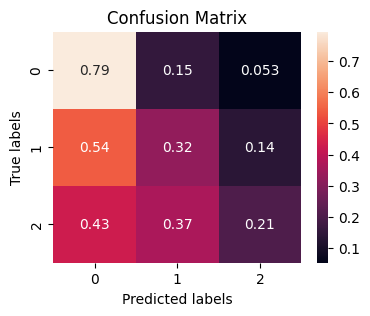

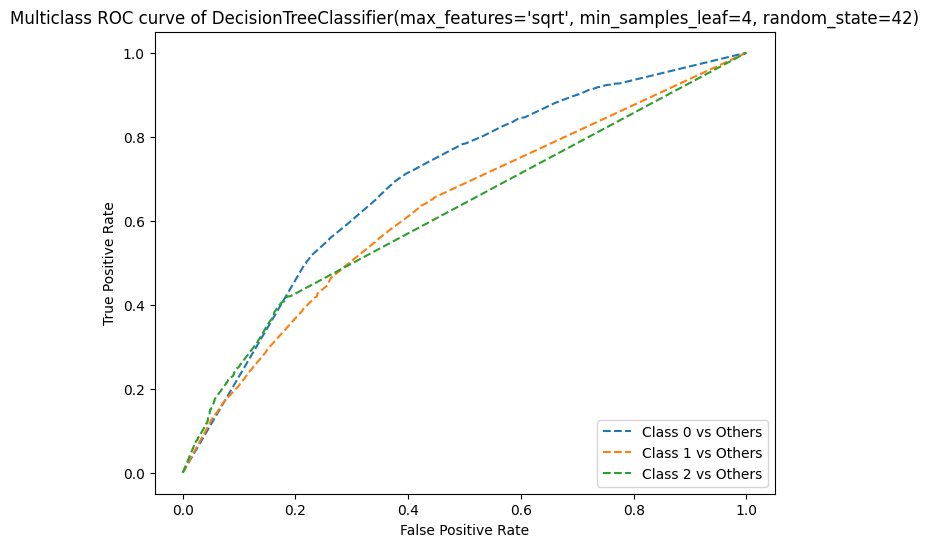

('Decision Tree RS',
 0.8601677728613569,
 0.6926386967880743,
 0.8602932279393644,
 0.7312788659411938,
 0.8601677728613569,
 0.6926386967880743,
 0.8599305411116622,
 0.7102928562212019,
 0.9733660322566698,
 0.6475736558089459)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create RandomizedSearchCV instance for Decision Tree Classifier
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model to find the best hyperparameters
random_search.fit(X_train_s, y_train_s)
#getting best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)
# Use the best model obtained from RandomizedSearchCV for predictions
best_model_decision_tree = random_search.best_estimator_
DT_RS= model_evaluation_metrics('Decision Tree RS',best_model_decision_tree, X_train_s, y_train_s, X_test, y_test)
DT_RS



In [ ]:
metrics_table.loc[3]=list(DT_RS)
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969
2,Decision Tree,0.999447,0.700323,0.999447,0.725970,0.999447,0.700323,0.999447,0.712367,1.000000,0.585809
3,Decision Tree RS,0.860168,0.692639,0.860293,0.731279,0.860168,0.692639,0.859931,0.710293,0.973366,0.647574


###**Model-3-Random Forest**
In the context of preventing overfitting, the Random Forest algorithm stands out by constructing multiple decision trees and consolidating their outputs to yield a more reliable and robust prediction. Unlike individual decision trees prone to overfitting by learning the intricacies of the training data, an ensemble of trees in a Random Forest amalgamates diverse perspectives, resulting in reduced overfitting tendencies. The accumulation of trees diminishes the model's inclination to memorize noise or idiosyncrasies in the dataset, promoting generalizability and improved performance on unseen data.

------------- Evaluation -------Random Forest-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     15497
           1       0.37      0.31      0.34      3312
           2       0.13      0.13      0.13       712

    accuracy                           0.76     19521
   macro avg       0.45      0.44      0.45     19521
weighted avg       0.75      0.76      0.75     19521



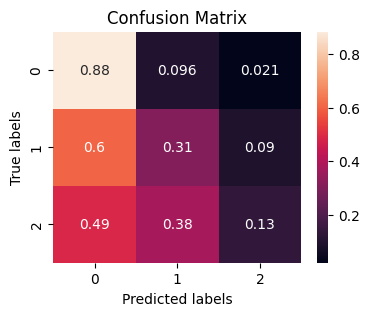

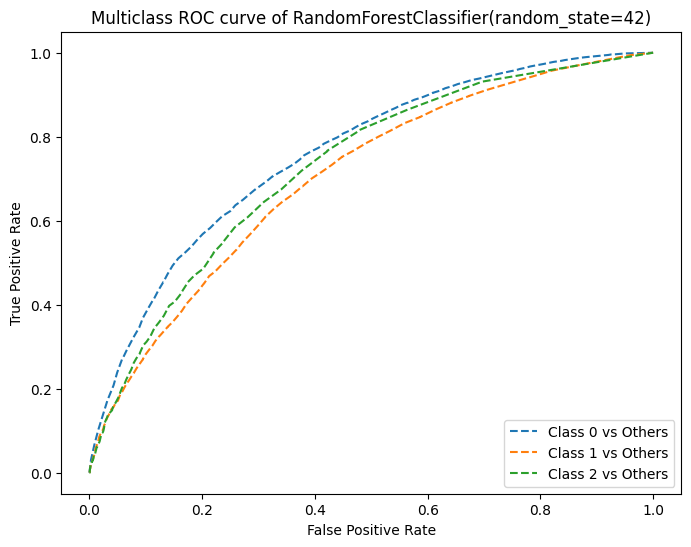

('Random Forest',
 0.9994469026548672,
 0.7584652425592951,
 0.999446894471062,
 0.7451046583093008,
 0.9994469026548672,
 0.7584652425592951,
 0.9994468854410704,
 0.7511309905308087,
 0.9999994991889128,
 0.7309561816256309)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the classifier to the training data
random_forest.fit(X_train_s, y_train_s)
RF= model_evaluation_metrics('Random Forest',random_forest, X_train_s, y_train_s, X_test, y_test)
RF

In [ ]:
metrics_table.loc[4]=list(RF)
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969
2,Decision Tree,0.999447,0.700323,0.999447,0.725970,0.999447,0.700323,0.999447,0.712367,1.000000,0.585809
3,Decision Tree RS,0.860168,0.692639,0.860293,0.731279,0.860168,0.692639,0.859931,0.710293,0.973366,0.647574
4,Random Forest,0.999447,0.758465,0.999447,0.745105,0.999447,0.758465,0.999447,0.751131,0.999999,0.730956


####**Model-3-Random Forest with hypertuning**

Best Parameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 14, 'min_samples_split': 19, 'n_estimators': 364}
------------- Evaluation -------Random Forest RS-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     15497
           1       0.59      0.18      0.27      3312
           2       0.00      0.00      0.00       712

    accuracy                           0.81     19521
   macro avg       0.47      0.39      0.39     19521
weighted avg       0.75      0.81      0.76     19521



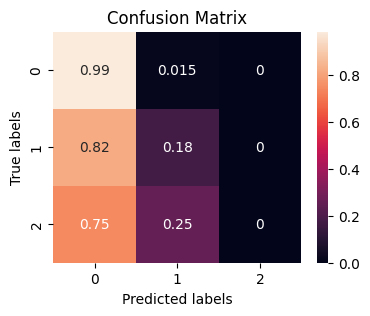

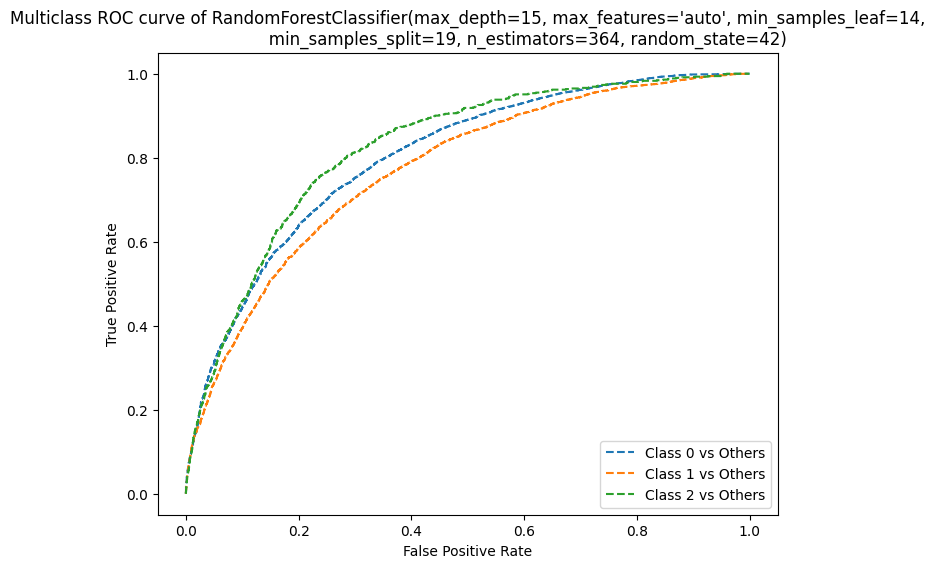

In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

random_forest = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 50, 5)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create RandomizedSearchCV instance for Random Forest Classifier
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

# Fit the model to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Use the best model obtained from RandomizedSearchCV for predictions
best_model_random_forest = random_search.best_estimator_
RFRS = model_evaluation_metrics('Random Forest RS', best_model_random_forest, X_train_s, y_train_s, X_test, y_test)


In [ ]:
metrics_table.loc[5]=list(RFRS)
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969
2,Decision Tree,0.999447,0.700323,0.999447,0.725970,0.999447,0.700323,0.999447,0.712367,1.000000,0.585809
3,Decision Tree RS,0.860168,0.692639,0.860293,0.731279,0.860168,0.692639,0.859931,0.710293,0.973366,0.647574
4,Random Forest,0.999447,0.758465,0.999447,0.745105,0.999447,0.758465,0.999447,0.751131,0.999999,0.730956
5,Random Forest RS,0.396543,0.811946,0.276716,0.753683,0.396543,0.811946,0.277666,0.758480,0.780648,0.798868


### Model-4 Adaboost

------------- Evaluation -------Ada Boost-----
---------------Test data ---------------

Classification_report
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     15497
           1       0.58      0.17      0.26      3312
           2       0.00      0.00      0.00       712

    accuracy                           0.81     19521
   macro avg       0.47      0.38      0.39     19521
weighted avg       0.75      0.81      0.76     19521



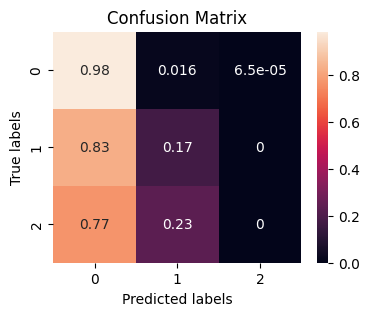

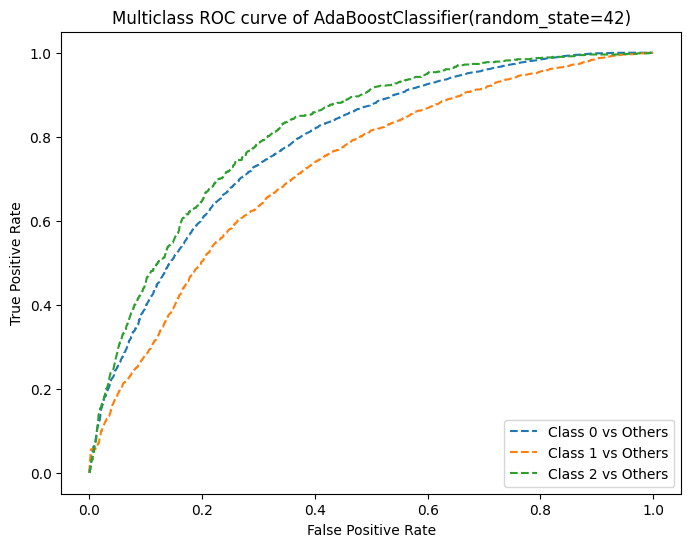

('Ada Boost',
 0.38229166666666664,
 0.8099994877311613,
 0.5165295051771577,
 0.7506764392557181,
 0.38229166666666664,
 0.8099994877311613,
 0.2600000990748015,
 0.755896828400487,
 0.7276226070687962,
 0.7746705294984496)

In [ ]:
# Create AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50, random_state=42)
# Train the AdaBoost classifier on the training data
ada_boost.fit(X_train, y_train)
ada= model_evaluation_metrics('Ada Boost',ada_boost, X_train_s, y_train_s, X_test, y_test)
ada

#Evaluation Metrics

In [ ]:
metrics_table.loc[6]=list(ada)
metrics_table

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1Score,Test_F1Score,Train_ROC_AUC,Test_ROC_AUC
0,Logistic_Regression,0.499263,0.539470,0.492345,0.750105,0.499263,0.539470,0.478582,0.615227,0.684735,0.689841
1,Logistic_Regression_RV,0.499346,0.539368,0.492368,0.749855,0.499346,0.539368,0.478382,0.615084,0.684732,0.689969
2,Decision Tree,0.999447,0.700323,0.999447,0.725970,0.999447,0.700323,0.999447,0.712367,1.000000,0.585809
3,Decision Tree RS,0.860168,0.692639,0.860293,0.731279,0.860168,0.692639,0.859931,0.710293,0.973366,0.647574
4,Random Forest,0.999447,0.758465,0.999447,0.745105,0.999447,0.758465,0.999447,0.751131,0.999999,0.730956
5,Random Forest RS,0.396543,0.811946,0.276716,0.753683,0.396543,0.811946,0.277666,0.758480,0.780648,0.798868
6,Ada Boost,0.382292,0.809999,0.516530,0.750676,0.382292,0.809999,0.260000,0.755897,0.727623,0.774671


<Axes: xlabel='Importance', ylabel='Variable'>

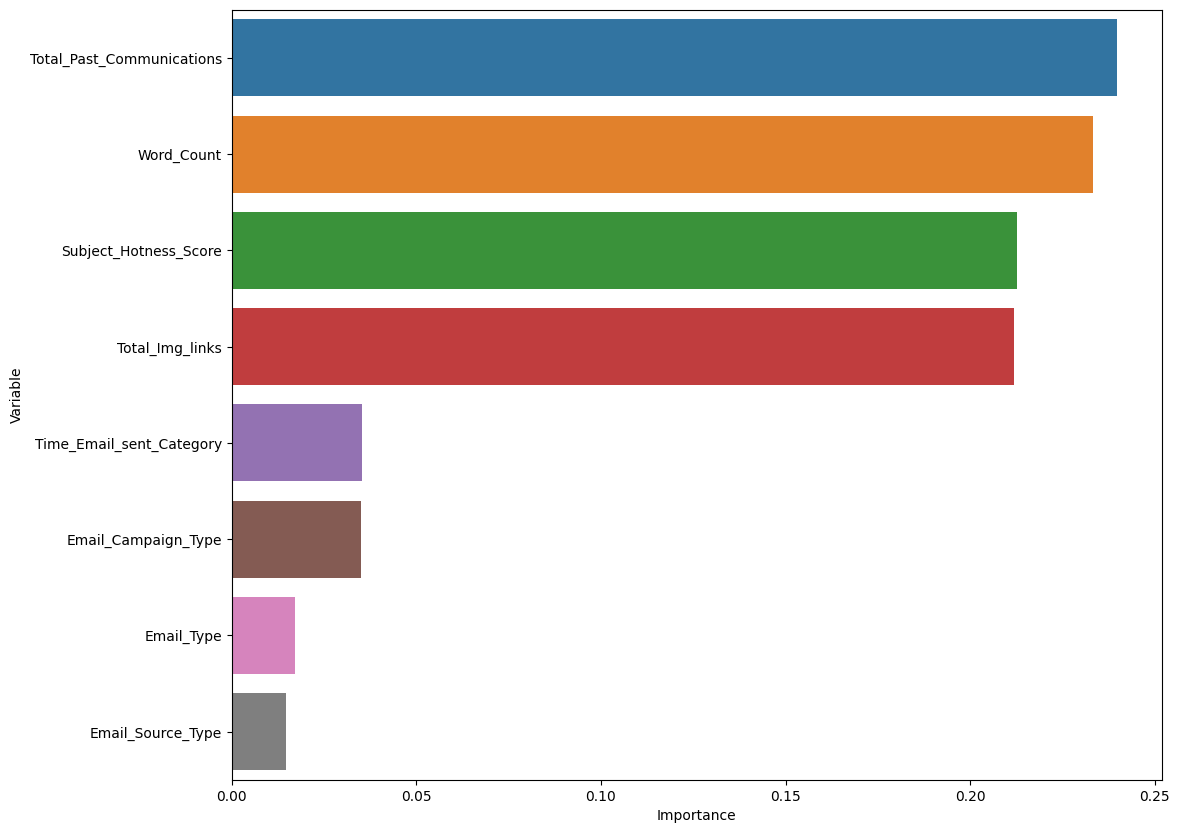

In [ ]:
#visualising feature importance of Random Forest best model
# Initializing RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the classifier to the training data
random_forest.fit(X_train_s, y_train_s)
feat_imp_ran = pd.DataFrame({"Variable": X_train_s.columns,"Importance": random_forest.feature_importances_})
feat_imp_ran.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feat_imp_ran['Importance'], y= feat_imp_ran['Variable'])

###Evaluation

Given a highly imbalanced dataset in a multiclass classification problem where the goal is to accurately classify between "ignored," "read," and "acknowledged" classes, the choice of the evaluation metric becomes crucial. When facing such imbalanced scenarios and aiming for a balanced performance between precision and recall, the F1 score takes precedence among the metrics discussed.

The F1 score harmonizes both precision and recall, ensuring a balance between false positives and false negatives. Achieving a high F1 score signifies a low rate of both types of errors, making it an optimal metric choice for evaluating model performance in scenarios with high class imbalance. Therefore, in the context of this problem, where classification accuracy is crucial across all classes, prioritizing the F1 score is essential for balanced performance assessment while considering the challenges posed by class imbalance.

So Here we have decided to take Random Forest becuase its F1 Score is high as compare to other models

#Conclusion

- Customer location doesn't significantly impact email responses (ignored, read, acknowledged).
- Campaign type 1 had fewer emails but a high likelihood of being read. Campaign type 2 saw the most emails, with most being ignored. Campaign 3 had fewer emails but more reads and acknowledgments.
- Time email sent isn't a strong factor; emails sent in the middle of the day tend to be read and acknowledged more.
- More past communications lead to increased reads and acknowledgments, showing a customer connection trend.
- Longer emails tend to get ignored more frequently.
- Ignored emails contain more images.
- Outliers exist in most continuous variables but we removed as they are not much influencing the majority and minority class, impacting results.

- Imbalanced class handling techniques, By using SMOTE, were applied post train-test split exclusively on the training data. This ensured that the model remained blind to the test set, though it somewhat reduced the overall results.
- SMOTE notably outperformed Random Undersampling, although there's a possibility it led to a loss of information.
- The Decision Tree Model displayed signs of overfitting, performing excellently on the train data but poorly on the test data.
- Hyperparameter tuning did not significantly improve the model's performance.
 -the Random Forest model achieved an highest F1 Score of 0.757 on the test set.

Recommendations based on analysis:

1. **Email Campaigns:**
   - Continuing Campaign 1 appears wiser given its higher success rate compared to other campaigns, suggesting discontinuation of the less successful campaigns.

2. **Email Content:**
   - Maintain a reasonable word count, ensuring concise and impactful content without excessive marketing gimmicks.

3. **Multimedia Usage:**
   - Control the number of images and links in emails to avoid overwhelming recipients.

4. **Customer Interaction:**
   - Maintain a healthy customer relationship as a higher number of past communications positively influenced email responses.

#User Prediction

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Collect input from the user for each feature
email_type = input("Enter Email Type (e.g., 0 for Business, 1 for Personal): ")
subject_hotness_score = input("Enter Subject Hotness Score: ")
email_source_type = input("Enter Email Source Type (e.g., 0 for Marketing, 1 for Newsletter): ")
email_campaign_type = input("Enter Email Campaign Type (e.g., 0 for Type 1, 1 for Type 2, 2 for Type 3): ")
total_past_communications = input("Enter Total Past Communications: ")
time_email_sent_category = input("Enter Time Email Sent Category (e.g., 0 for Morning, 1 for Afternoon, 2 for Night): ")
word_count = input("Enter Word Count: ")
total_img_links = input("Enter Total Image Links: ")

# Convert inputs to float or integer as needed
user_input = np.array([[float(email_type), float(subject_hotness_score), float(email_source_type),
                        float(email_campaign_type), float(total_past_communications), float(time_email_sent_category),
                        float(word_count), float(total_img_links)]])

# Initialize the StandardScaler (use the same scaler used in model training)
scaler = StandardScaler()  # Example: scaler = StandardScaler().fit(X_train)

# Scale the user input
scaled_input = scaler.fit_transform(user_input)

# Use your trained model for predictions
# Replace 'model' with your trained model
prediction = random_forest.predict(scaled_input)

# Output the prediction
print("Predicted Class:", prediction)


Enter Email Type (e.g., 0 for Business, 1 for Personal): 1
Enter Subject Hotness Score: 25
Enter Email Source Type (e.g., 0 for Marketing, 1 for Newsletter): 0
Enter Email Campaign Type (e.g., 0 for Type 1, 1 for Type 2, 2 for Type 3): 2
Enter Total Past Communications: 20
Enter Time Email Sent Category (e.g., 0 for Morning, 1 for Afternoon, 2 for Night): 2
Enter Word Count: 200
Enter Total Image Links: 45
Predicted Class: [1]
